<center><h1>Rashinkar_Payal_HW5</h1></center>
<br>
<br>

Name: Payal Rashinkar
<br>
Github Username: PayalRashinkar
<br>
USC ID: 3885-1419-03

## 1. Decision Trees as Interpretable Models

Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import _tree
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import xgboost

### (a) Obtain Data

Get the Accute Inflamations Data Set

In [10]:
data = pd.read_csv("../../../Downloads/Homework 5 Data/diagnosis.data", decimal = ',', encoding="utf-16", sep='\t', header=None, names=['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra','Inflammation','Nephritis'])
data

Temperature Nausea Lumbar Urine Micturition Urethra Inflammation  \
0           35.5     no    yes    no          no      no           no   
1           35.9     no     no   yes         yes     yes          yes   
2           35.9     no    yes    no          no      no           no   
3           36.0     no     no   yes         yes     yes          yes   
4           36.0     no    yes    no          no      no           no   
..           ...    ...    ...   ...         ...     ...          ...   
115         41.4     no    yes   yes          no     yes           no   
116         41.5     no     no    no          no      no           no   
117         41.5    yes    yes    no         yes      no           no   
118         41.5     no    yes   yes          no     yes           no   
119         41.5     no    yes   yes          no     yes           no   

    Nephritis  
0          no  
1          no  
2          no  
3          no  
4          no  
..        ...  
115       yes  
116        no  
117       yes  
118       yes  
119       yes  

[120 rows x 8 columns]

Temperature Nausea Lumbar Urine Micturition Urethra Inflammation  \
0           35.5     no    yes    no          no      no           no   
1           35.9     no     no   yes         yes     yes          yes   
2           35.9     no    yes    no          no      no           no   
3           36.0     no     no   yes         yes     yes          yes   
4           36.0     no    yes    no          no      no           no   
..           ...    ...    ...   ...         ...     ...          ...   
115         41.4     no    yes   yes          no     yes           no   
116         41.5     no     no    no          no      no           no   
117         41.5    yes    yes    no         yes      no           no   
118         41.5     no    yes   yes          no     yes           no   
119         41.5     no    yes   yes          no     yes           no   

    Nephritis  
0          no  
1          no  
2          no  
3          no  
4          no  
..        ...  
115       yes  
116        no  
117       yes  
118       yes  
119       yes  

[120 rows x 8 columns]

In [11]:
le = preprocessing.LabelEncoder()
data['Nausea'] = le.fit_transform(data['Nausea'])
data['Lumbar'] = le.fit_transform(data['Lumbar'])
data['Urine'] = le.fit_transform(data['Urine'])
data['Micturition'] = le.fit_transform(data['Micturition'])
data['Urethra'] = le.fit_transform(data['Urethra'])
data['Inflammation'] = le.fit_transform(data['Inflammation'])
data['Nephritis'] = le.fit_transform(data['Nephritis'])

In [12]:
data.iloc[:,:6]

Temperature  Nausea  Lumbar  Urine  Micturition  Urethra
0           35.5       0       1      0            0        0
1           35.9       0       0      1            1        1
2           35.9       0       1      0            0        0
3           36.0       0       0      1            1        1
4           36.0       0       1      0            0        0
..           ...     ...     ...    ...          ...      ...
115         41.4       0       1      1            0        1
116         41.5       0       0      0            0        0
117         41.5       1       1      0            1        0
118         41.5       0       1      1            0        1
119         41.5       0       1      1            0        1

[120 rows x 6 columns]

Temperature  Nausea  Lumbar  Urine  Micturition  Urethra
0           35.5       0       1      0            0        0
1           35.9       0       0      1            1        1
2           35.9       0       1      0            0        0
3           36.0       0       0      1            1        1
4           36.0       0       1      0            0        0
..           ...     ...     ...    ...          ...      ...
115         41.4       0       1      1            0        1
116         41.5       0       0      0            0        0
117         41.5       1       1      0            1        0
118         41.5       0       1      1            0        1
119         41.5       0       1      1            0        1

[120 rows x 6 columns]

### (b) Build a decision tree

[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[1] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[1] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

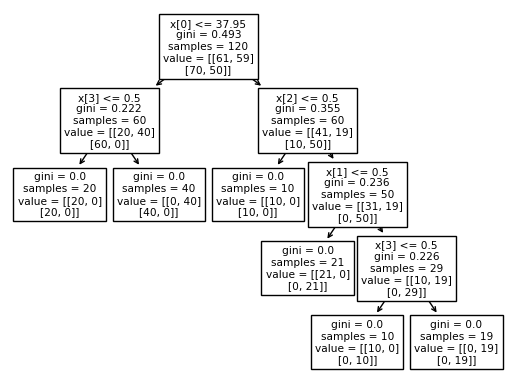

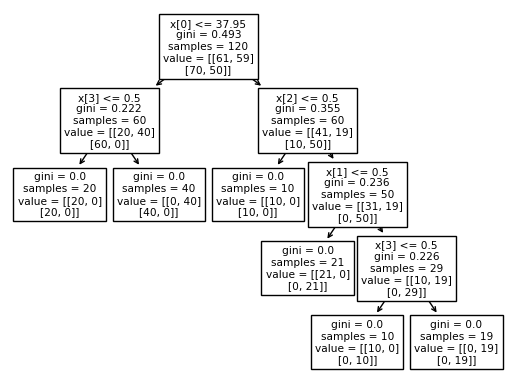

In [13]:
X=data.drop(["Inflammation","Nephritis"],axis=1)
y=data[["Inflammation","Nephritis"]]
dt = tree.DecisionTreeClassifier()
dt.fit(X, y)
tree.plot_tree(dt)

### (c) Convert the decision rules

In [14]:
def tree_to_code(tree, feature_names):

    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [15]:
data.columns

Index(['Temperature', 'Nausea', 'Lumbar', 'Urine', 'Micturition', 'Urethra',
       'Inflammation', 'Nephritis'],
      dtype='object')

Index(['Temperature', 'Nausea', 'Lumbar', 'Urine', 'Micturition', 'Urethra',
       'Inflammation', 'Nephritis'],
      dtype='object')

In [16]:
tree_to_code(dt,data.columns)

def tree(Temperature, Nausea, Lumbar, Urine, Micturition, Urethra, Inflammation, Nephritis):
  if Temperature <= 37.95000076293945:
    if Urine <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if Urine > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar > 0.5
      if Nausea <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Nausea > 0.5
        if Urine <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]
def tree(Temperature, Nausea, Lumbar, Urine, Micturition, Urethra, Inflammation, Nephritis):
  if Temperature <= 37.95000076293945:
    if Urine <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if Urine > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar > 0.

### (d) Using cost-complexity pruning

In [17]:
dt=tree.DecisionTreeClassifier()
path = dt.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas

In [18]:
ccp_alphas

array([0.        , 0.04908333, 0.07947222, 0.11111111, 0.20423611])

array([0.        , 0.04908333, 0.07947222, 0.11111111, 0.20423611])

In [19]:
param_grid = {'criterion':['gini','entropy'], 'ccp_alpha': ccp_alphas}
dt_cv = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5)
dt_cv.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.04908333, 0.07947222, 0.11111111, 0.20423611]),
                         'criterion': ['gini', 'entropy']})

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.04908333, 0.07947222, 0.11111111, 0.20423611]),
                         'criterion': ['gini', 'entropy']})

In [20]:
dt_cv.best_params_

{'ccp_alpha': 0.0, 'criterion': 'gini'}

{'ccp_alpha': 0.0, 'criterion': 'gini'}

In [21]:
dt = tree.DecisionTreeClassifier(ccp_alpha= 0, criterion= 'gini')
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0)

DecisionTreeClassifier(ccp_alpha=0)

In [22]:
tree_to_code(dt, list(data.columns))

def tree(Temperature, Nausea, Lumbar, Urine, Micturition, Urethra, Inflammation, Nephritis):
  if Temperature <= 37.95000076293945:
    if Lumbar <= 0.5:
      return [[ 0. 40.]
 [40.  0.]]
    else:  # if Lumbar > 0.5
      return [[20.  0.]
 [20.  0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar > 0.5
      if Nausea <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Nausea > 0.5
        if Urine <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]
def tree(Temperature, Nausea, Lumbar, Urine, Micturition, Urethra, Inflammation, Nephritis):
  if Temperature <= 37.95000076293945:
    if Lumbar <= 0.5:
      return [[ 0. 40.]
 [40.  0.]]
    else:  # if Lumbar > 0.5
      return [[20.  0.]
 [20.  0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar 

[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[2] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[1] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[2] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[1] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

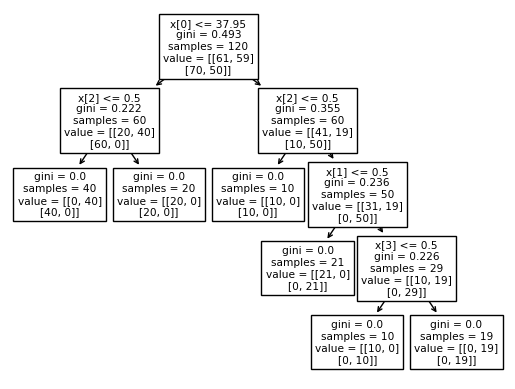

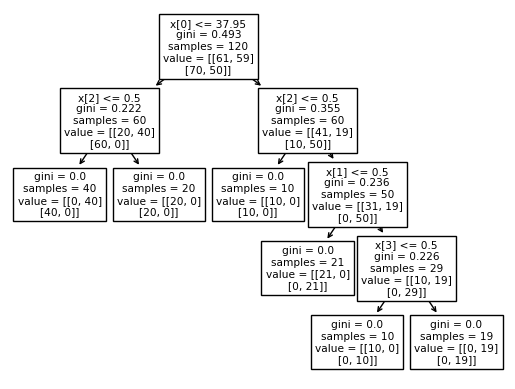

In [23]:
tree.plot_tree(dt)

## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [25]:
cd = pd.read_csv('../../../Downloads/Homework 5 Data/communities.data', header=None)
cd

0   1      2                    3    4     5     6     7     8     9    \
0       8   ?      ?         Lakewoodcity    1  0.19  0.33  0.02  0.90  0.12   
1      53   ?      ?          Tukwilacity    1  0.00  0.16  0.12  0.74  0.45   
2      24   ?      ?         Aberdeentown    1  0.00  0.42  0.49  0.56  0.17   
3      34   5  81440  Willingborotownship    1  0.04  0.77  1.00  0.08  0.12   
4      42  95   6096    Bethlehemtownship    1  0.01  0.55  0.02  0.95  0.09   
...   ...  ..    ...                  ...  ...   ...   ...   ...   ...   ...   
1989   12   ?      ?    TempleTerracecity   10  0.01  0.40  0.10  0.87  0.12   
1990    6   ?      ?          Seasidecity   10  0.05  0.96  0.46  0.28  0.83   
1991    9   9  80070        Waterburytown   10  0.16  0.37  0.25  0.69  0.04   
1992   25  17  72600          Walthamcity   10  0.08  0.51  0.06  0.87  0.22   
1993    6   ?      ?          Ontariocity   10  0.20  0.78  0.14  0.46  0.24   

      ...   118   119   120   121   122   123  124   125   126   127  
0     ...  0.12  0.26  0.20  0.06  0.04   0.9  0.5  0.32  0.14  0.20  
1     ...  0.02  0.12  0.45     ?     ?     ?    ?  0.00     ?  0.67  
2     ...  0.01  0.21  0.02     ?     ?     ?    ?  0.00     ?  0.43  
3     ...  0.02  0.39  0.28     ?     ?     ?    ?  0.00     ?  0.12  
4     ...  0.04  0.09  0.02     ?     ?     ?    ?  0.00     ?  0.03  
...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...  
1989  ...  0.01  0.28  0.05     ?     ?     ?    ?  0.00     ?  0.09  
1990  ...  0.02  0.37  0.20     ?     ?     ?    ?  0.00     ?  0.45  
1991  ...  0.08  0.32  0.18  0.08  0.06  0.78    0  0.91  0.28  0.23  
1992  ...  0.03  0.38  0.33  0.02  0.02  0.79    0  0.22  0.18  0.19  
1993  ...  0.11  0.30  0.05  0.08  0.04  0.73  0.5  1.00  0.13  0.48  

[1994 rows x 128 columns]

0   1      2                    3    4     5     6     7     8     9    \
0       8   ?      ?         Lakewoodcity    1  0.19  0.33  0.02  0.90  0.12   
1      53   ?      ?          Tukwilacity    1  0.00  0.16  0.12  0.74  0.45   
2      24   ?      ?         Aberdeentown    1  0.00  0.42  0.49  0.56  0.17   
3      34   5  81440  Willingborotownship    1  0.04  0.77  1.00  0.08  0.12   
4      42  95   6096    Bethlehemtownship    1  0.01  0.55  0.02  0.95  0.09   
...   ...  ..    ...                  ...  ...   ...   ...   ...   ...   ...   
1989   12   ?      ?    TempleTerracecity   10  0.01  0.40  0.10  0.87  0.12   
1990    6   ?      ?          Seasidecity   10  0.05  0.96  0.46  0.28  0.83   
1991    9   9  80070        Waterburytown   10  0.16  0.37  0.25  0.69  0.04   
1992   25  17  72600          Walthamcity   10  0.08  0.51  0.06  0.87  0.22   
1993    6   ?      ?          Ontariocity   10  0.20  0.78  0.14  0.46  0.24   

      ...   118   119   120   121   122   123  124   125   126   127  
0     ...  0.12  0.26  0.20  0.06  0.04   0.9  0.5  0.32  0.14  0.20  
1     ...  0.02  0.12  0.45     ?     ?     ?    ?  0.00     ?  0.67  
2     ...  0.01  0.21  0.02     ?     ?     ?    ?  0.00     ?  0.43  
3     ...  0.02  0.39  0.28     ?     ?     ?    ?  0.00     ?  0.12  
4     ...  0.04  0.09  0.02     ?     ?     ?    ?  0.00     ?  0.03  
...   ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...  
1989  ...  0.01  0.28  0.05     ?     ?     ?    ?  0.00     ?  0.09  
1990  ...  0.02  0.37  0.20     ?     ?     ?    ?  0.00     ?  0.45  
1991  ...  0.08  0.32  0.18  0.08  0.06  0.78    0  0.91  0.28  0.23  
1992  ...  0.03  0.38  0.33  0.02  0.02  0.79    0  0.22  0.18  0.19  
1993  ...  0.11  0.30  0.05  0.08  0.04  0.73  0.5  1.00  0.13  0.48  

[1994 rows x 128 columns]

In [27]:
f = open('../../../Downloads/Homework 5 Data/communities.names')
column_names = []
for line in f:
    lst = []
    if line.startswith('@attribute'):
        lst = line.split()
        column_names.append(lst[1])
cd.columns = column_names

In [28]:
cd.drop(columns=['state', 'county', 'community', 'communityname', 'fold'], inplace=True)
cd.replace(['?'], (np.nan), inplace=True)

In [29]:
train=cd.iloc[:1495]
train

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1490         0.07         0.41         0.28         0.23        0.57  ...   
1491         0.42         0.44         0.57         0.40        0.25  ...   
1492         0.01         0.44         0.42         0.27        0.63  ...   
1493         0.01         0.40         0.40         0.24        0.29  ...   
1494         1.00         0.37         0.52         0.33        0.44  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20       0.06           0.04   
1         0.02     0.12            0.45        NaN            NaN   
2         0.01     0.21            0.02        NaN            NaN   
3         0.02     0.39            0.28        NaN            NaN   
4         0.04     0.09            0.02        NaN            NaN   
...        ...      ...             ...        ...            ...   
1490      0.02     0.14            0.22        NaN            NaN   
1491      0.07     0.40            0.14       0.07           0.05   
1492      0.03     0.12            0.01        NaN            NaN   
1493      0.08     0.15            0.02        NaN            NaN   
1494      0.00     1.00            1.00          0           0.01   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                     0.9                  0.5                 0.32   
1                     NaN                  NaN                 0.00   
2                     NaN                  NaN                 0.00   
3                     NaN                  NaN                 0.00   
4                     NaN                  NaN                 0.00   
...                   ...                  ...                  ...   
1490                  NaN                  NaN                 0.00   
1491                 0.85                  0.5                 0.61   
1492                  NaN                  NaN                 0.00   
1493                  NaN                  NaN                 0.00   
1494                 0.77                    0                 0.51   

      PolicBudgPerPop  ViolentCrimesPerPop  
0                0.14                 0.20  
1                 NaN                 0.67  
2                 NaN                 0.43  
3                 NaN                 0.12  
4                 NaN                 0.03  
...               ...                  ...  
1490              NaN                 0.03  
1491             0.19                 0.20  
1492              NaN                 0.30  
1493              NaN   

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1490         0.07         0.41         0.28         0.23        0.57  ...   
1491         0.42         0.44         0.57         0.40        0.25  ...   
1492         0.01         0.44         0.42         0.27        0.63  ...   
1493         0.01         0.40         0.40         0.24        0.29  ...   
1494         1.00         0.37         0.52         0.33        0.44  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20       0.06           0.04   
1         0.02     0.12            0.45        NaN            NaN   
2         0.01     0.21            0.02        NaN            NaN   
3         0.02     0.39            0.28        NaN            NaN   
4         0.04     0.09            0.02        NaN            NaN   
...        ...      ...             ...        ...            ...   
1490      0.02     0.14            0.22        NaN            NaN   
1491      0.07     0.40            0.14       0.07           0.05   
1492      0.03     0.12            0.01        NaN            NaN   
1493      0.08     0.15            0.02        NaN            NaN   
1494      0.00     1.00            1.00          0           0.01   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                     0.9                  0.5                 0.32   
1                     NaN                  NaN                 0.00   
2                     NaN                  NaN                 0.00   
3                     NaN                  NaN                 0.00   
4                     NaN                  NaN                 0.00   
...                   ...                  ...                  ...   
1490                  NaN                  NaN                 0.00   
1491                 0.85                  0.5                 0.61   
1492                  NaN                  NaN                 0.00   
1493                  NaN                  NaN                 0.00   
1494                 0.77                    0                 0.51   

      PolicBudgPerPop  ViolentCrimesPerPop  
0                0.14                 0.20  
1                 NaN                 0.67  
2                 NaN                 0.43  
3                 NaN                 0.12  
4                 NaN                 0.03  
...               ...                  ...  
1490              NaN                 0.03  
1491             0.19                 0.20  
1492              NaN                 0.30  
1493              NaN   

In [30]:
test=cd.iloc[1495:]
test.reset_index(drop=True, inplace=True)
test

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0          0.00           0.20          0.03          0.91          0.23   
1          0.00           0.55          0.13          0.78          0.15   
2          0.00           0.52          0.04          0.59          0.05   
3          0.04           0.51          0.07          0.92          0.09   
4          0.03           0.59          0.20          0.75          0.19   
..          ...            ...           ...           ...           ...   
494        0.01           0.40          0.10          0.87          0.12   
495        0.05           0.96          0.46          0.28          0.83   
496        0.16           0.37          0.25          0.69          0.04   
497        0.08           0.51          0.06          0.87          0.22   
498        0.20           0.78          0.14          0.46          0.24   

     racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0           0.05         0.15         0.19         0.09        0.42  ...   
1           0.36         0.48         0.53         0.30        0.10  ...   
2           0.62         0.84         0.78         0.75        0.43  ...   
3           0.03         0.38         0.47         0.27        0.35  ...   
4           0.10         0.38         0.62         0.35        0.11  ...   
..           ...          ...          ...          ...         ...  ...   
494         0.16         0.43         0.51         0.35        0.30  ...   
495         0.32         0.69         0.86         0.73        0.14  ...   
496         0.25         0.35         0.50         0.31        0.54  ...   
497         0.10         0.58         0.74         0.63        0.41  ...   
498         0.77         0.50         0.62         0.40        0.17  ...   

     LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0        0.01     0.23            0.73        NaN            NaN   
1        0.01     0.18            0.02        NaN            NaN   
2        0.01     0.18            0.00        NaN            NaN   
3        0.06     0.13            0.16        NaN            NaN   
4        0.03     0.23            0.06        NaN            NaN   
..        ...      ...             ...        ...            ...   
494      0.01     0.28            0.05        NaN            NaN   
495      0.02     0.37            0.20        NaN            NaN   
496      0.08     0.32            0.18       0.08           0.06   
497      0.03     0.38            0.33       0.02           0.02   
498      0.11     0.30            0.05       0.08           0.04   

     LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                    NaN                  NaN                 0.00   
1                    NaN                  NaN                 0.00   
2                    NaN                  NaN                 0.00   
3                    NaN                  NaN                 0.00   
4                    NaN                  NaN                 0.00   
..                   ...                  ...                  ...   
494                  NaN                  NaN                 0.00   
495                  NaN                  NaN                 0.00   
496                 0.78                    0                 0.91   
497                 0.79                    0                 0.22   
498                 0.73                  0.5                 1.00   

     PolicBudgPerPop  ViolentCrimesPerPop  
0                NaN                 0.12  
1                NaN                 0.11  
2                NaN                 0.12  
3                NaN                 0.06  
4                NaN                 0.12  
..               ...                  ...  
494              NaN                 0.09  
495              NaN                 0.45  
496             0.28                 0.23  
497             0.18                 0.19  
498             0.13                 

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0          0.00           0.20          0.03          0.91          0.23   
1          0.00           0.55          0.13          0.78          0.15   
2          0.00           0.52          0.04          0.59          0.05   
3          0.04           0.51          0.07          0.92          0.09   
4          0.03           0.59          0.20          0.75          0.19   
..          ...            ...           ...           ...           ...   
494        0.01           0.40          0.10          0.87          0.12   
495        0.05           0.96          0.46          0.28          0.83   
496        0.16           0.37          0.25          0.69          0.04   
497        0.08           0.51          0.06          0.87          0.22   
498        0.20           0.78          0.14          0.46          0.24   

     racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0           0.05         0.15         0.19         0.09        0.42  ...   
1           0.36         0.48         0.53         0.30        0.10  ...   
2           0.62         0.84         0.78         0.75        0.43  ...   
3           0.03         0.38         0.47         0.27        0.35  ...   
4           0.10         0.38         0.62         0.35        0.11  ...   
..           ...          ...          ...          ...         ...  ...   
494         0.16         0.43         0.51         0.35        0.30  ...   
495         0.32         0.69         0.86         0.73        0.14  ...   
496         0.25         0.35         0.50         0.31        0.54  ...   
497         0.10         0.58         0.74         0.63        0.41  ...   
498         0.77         0.50         0.62         0.40        0.17  ...   

     LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0        0.01     0.23            0.73        NaN            NaN   
1        0.01     0.18            0.02        NaN            NaN   
2        0.01     0.18            0.00        NaN            NaN   
3        0.06     0.13            0.16        NaN            NaN   
4        0.03     0.23            0.06        NaN            NaN   
..        ...      ...             ...        ...            ...   
494      0.01     0.28            0.05        NaN            NaN   
495      0.02     0.37            0.20        NaN            NaN   
496      0.08     0.32            0.18       0.08           0.06   
497      0.03     0.38            0.33       0.02           0.02   
498      0.11     0.30            0.05       0.08           0.04   

     LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                    NaN                  NaN                 0.00   
1                    NaN                  NaN                 0.00   
2                    NaN                  NaN                 0.00   
3                    NaN                  NaN                 0.00   
4                    NaN                  NaN                 0.00   
..                   ...                  ...                  ...   
494                  NaN                  NaN                 0.00   
495                  NaN                  NaN                 0.00   
496                 0.78                    0                 0.91   
497                 0.79                    0                 0.22   
498                 0.73                  0.5                 1.00   

     PolicBudgPerPop  ViolentCrimesPerPop  
0                NaN                 0.12  
1                NaN                 0.11  
2                NaN                 0.12  
3                NaN                 0.06  
4                NaN                 0.12  
..               ...                  ...  
494              NaN                 0.09  
495              NaN                 0.45  
496             0.28                 0.23  
497             0.18                 0.19  
498             0.13                 

### (b) Missing values

In [31]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
train=imp.fit_transform(train)
train1=pd.DataFrame(train, columns=column_names[5:])
train1

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1490         0.07         0.41         0.28         0.23        0.57  ...   
1491         0.42         0.44         0.57         0.40        0.25  ...   
1492         0.01         0.44         0.42         0.27        0.63  ...   
1493         0.01         0.40         0.40         0.24        0.29  ...   
1494         1.00         0.37         0.52         0.33        0.44  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20   0.060000       0.040000   
1         0.02     0.12            0.45   0.163975       0.080502   
2         0.01     0.21            0.02   0.163975       0.080502   
3         0.02     0.39            0.28   0.163975       0.080502   
4         0.04     0.09            0.02   0.163975       0.080502   
...        ...      ...             ...        ...            ...   
1490      0.02     0.14            0.22   0.163975       0.080502   
1491      0.07     0.40            0.14   0.070000       0.050000   
1492      0.03     0.12            0.01   0.163975       0.080502   
1493      0.08     0.15            0.02   0.163975       0.080502   
1494      0.00     1.00            1.00   0.000000       0.010000   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                0.900000             0.500000                 0.32   
1                0.713054             0.451883                 0.00   
2                0.713054             0.451883                 0.00   
3                0.713054             0.451883                 0.00   
4                0.713054             0.451883                 0.00   
...                   ...                  ...                  ...   
1490             0.713054             0.451883                 0.00   
1491             0.850000             0.500000                 0.61   
1492             0.713054             0.451883                 0.00   
1493             0.713054             0.451883                 0.00   
1494             0.770000             0.000000                 0.51   

      PolicBudgPerPop  ViolentCrimesPerPop  
0            0.140000                 0.20  
1            0.190753                 0.67  
2            0.190753                 0.43  
3            0.190753                 0.12  
4            0.190753                 0.03  
...               ...                  ...  
1490         0.190753                 0.03  
1491         0.190000                 0.20  
1492         0.190753                 0.30  
1493         0.190753   

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1490         0.07         0.41         0.28         0.23        0.57  ...   
1491         0.42         0.44         0.57         0.40        0.25  ...   
1492         0.01         0.44         0.42         0.27        0.63  ...   
1493         0.01         0.40         0.40         0.24        0.29  ...   
1494         1.00         0.37         0.52         0.33        0.44  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20   0.060000       0.040000   
1         0.02     0.12            0.45   0.163975       0.080502   
2         0.01     0.21            0.02   0.163975       0.080502   
3         0.02     0.39            0.28   0.163975       0.080502   
4         0.04     0.09            0.02   0.163975       0.080502   
...        ...      ...             ...        ...            ...   
1490      0.02     0.14            0.22   0.163975       0.080502   
1491      0.07     0.40            0.14   0.070000       0.050000   
1492      0.03     0.12            0.01   0.163975       0.080502   
1493      0.08     0.15            0.02   0.163975       0.080502   
1494      0.00     1.00            1.00   0.000000       0.010000   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                0.900000             0.500000                 0.32   
1                0.713054             0.451883                 0.00   
2                0.713054             0.451883                 0.00   
3                0.713054             0.451883                 0.00   
4                0.713054             0.451883                 0.00   
...                   ...                  ...                  ...   
1490             0.713054             0.451883                 0.00   
1491             0.850000             0.500000                 0.61   
1492             0.713054             0.451883                 0.00   
1493             0.713054             0.451883                 0.00   
1494             0.770000             0.000000                 0.51   

      PolicBudgPerPop  ViolentCrimesPerPop  
0            0.140000                 0.20  
1            0.190753                 0.67  
2            0.190753                 0.43  
3            0.190753                 0.12  
4            0.190753                 0.03  
...               ...                  ...  
1490         0.190753                 0.03  
1491         0.190000                 0.20  
1492         0.190753                 0.30  
1493         0.190753   

In [32]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
test=imp.fit_transform(test)
test1=pd.DataFrame(test, columns=column_names[5:])
test1

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0          0.00           0.20          0.03          0.91          0.23   
1          0.00           0.55          0.13          0.78          0.15   
2          0.00           0.52          0.04          0.59          0.05   
3          0.04           0.51          0.07          0.92          0.09   
4          0.03           0.59          0.20          0.75          0.19   
..          ...            ...           ...           ...           ...   
494        0.01           0.40          0.10          0.87          0.12   
495        0.05           0.96          0.46          0.28          0.83   
496        0.16           0.37          0.25          0.69          0.04   
497        0.08           0.51          0.06          0.87          0.22   
498        0.20           0.78          0.14          0.46          0.24   

     racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0           0.05         0.15         0.19         0.09        0.42  ...   
1           0.36         0.48         0.53         0.30        0.10  ...   
2           0.62         0.84         0.78         0.75        0.43  ...   
3           0.03         0.38         0.47         0.27        0.35  ...   
4           0.10         0.38         0.62         0.35        0.11  ...   
..           ...          ...          ...          ...         ...  ...   
494         0.16         0.43         0.51         0.35        0.30  ...   
495         0.32         0.69         0.86         0.73        0.14  ...   
496         0.25         0.35         0.50         0.31        0.54  ...   
497         0.10         0.58         0.74         0.63        0.41  ...   
498         0.77         0.50         0.62         0.40        0.17  ...   

     LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0        0.01     0.23            0.73     0.1605       0.065375   
1        0.01     0.18            0.02     0.1605       0.065375   
2        0.01     0.18            0.00     0.1605       0.065375   
3        0.06     0.13            0.16     0.1605       0.065375   
4        0.03     0.23            0.06     0.1605       0.065375   
..        ...      ...             ...        ...            ...   
494      0.01     0.28            0.05     0.1605       0.065375   
495      0.02     0.37            0.20     0.1605       0.065375   
496      0.08     0.32            0.18     0.0800       0.060000   
497      0.03     0.38            0.33     0.0200       0.020000   
498      0.11     0.30            0.05     0.0800       0.040000   

     LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0               0.655375              0.40625                 0.00   
1               0.655375              0.40625                 0.00   
2               0.655375              0.40625                 0.00   
3               0.655375              0.40625                 0.00   
4               0.655375              0.40625                 0.00   
..                   ...                  ...                  ...   
494             0.655375              0.40625                 0.00   
495             0.655375              0.40625                 0.00   
496             0.780000              0.00000                 0.91   
497             0.790000              0.00000                 0.22   
498             0.730000              0.50000                 1.00   

     PolicBudgPerPop  ViolentCrimesPerPop  
0              0.208                 0.12  
1              0.208                 0.11  
2              0.208                 0.12  
3              0.208                 0.06  
4              0.208                 0.12  
..               ...                  ...  
494            0.208                 0.09  
495            0.208                 0.45  
496            0.280                 0.23  
497            0.180                 0.19  
498            0.130                 

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0          0.00           0.20          0.03          0.91          0.23   
1          0.00           0.55          0.13          0.78          0.15   
2          0.00           0.52          0.04          0.59          0.05   
3          0.04           0.51          0.07          0.92          0.09   
4          0.03           0.59          0.20          0.75          0.19   
..          ...            ...           ...           ...           ...   
494        0.01           0.40          0.10          0.87          0.12   
495        0.05           0.96          0.46          0.28          0.83   
496        0.16           0.37          0.25          0.69          0.04   
497        0.08           0.51          0.06          0.87          0.22   
498        0.20           0.78          0.14          0.46          0.24   

     racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0           0.05         0.15         0.19         0.09        0.42  ...   
1           0.36         0.48         0.53         0.30        0.10  ...   
2           0.62         0.84         0.78         0.75        0.43  ...   
3           0.03         0.38         0.47         0.27        0.35  ...   
4           0.10         0.38         0.62         0.35        0.11  ...   
..           ...          ...          ...          ...         ...  ...   
494         0.16         0.43         0.51         0.35        0.30  ...   
495         0.32         0.69         0.86         0.73        0.14  ...   
496         0.25         0.35         0.50         0.31        0.54  ...   
497         0.10         0.58         0.74         0.63        0.41  ...   
498         0.77         0.50         0.62         0.40        0.17  ...   

     LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0        0.01     0.23            0.73     0.1605       0.065375   
1        0.01     0.18            0.02     0.1605       0.065375   
2        0.01     0.18            0.00     0.1605       0.065375   
3        0.06     0.13            0.16     0.1605       0.065375   
4        0.03     0.23            0.06     0.1605       0.065375   
..        ...      ...             ...        ...            ...   
494      0.01     0.28            0.05     0.1605       0.065375   
495      0.02     0.37            0.20     0.1605       0.065375   
496      0.08     0.32            0.18     0.0800       0.060000   
497      0.03     0.38            0.33     0.0200       0.020000   
498      0.11     0.30            0.05     0.0800       0.040000   

     LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0               0.655375              0.40625                 0.00   
1               0.655375              0.40625                 0.00   
2               0.655375              0.40625                 0.00   
3               0.655375              0.40625                 0.00   
4               0.655375              0.40625                 0.00   
..                   ...                  ...                  ...   
494             0.655375              0.40625                 0.00   
495             0.655375              0.40625                 0.00   
496             0.780000              0.00000                 0.91   
497             0.790000              0.00000                 0.22   
498             0.730000              0.50000                 1.00   

     PolicBudgPerPop  ViolentCrimesPerPop  
0              0.208                 0.12  
1              0.208                 0.11  
2              0.208                 0.12  
3              0.208                 0.06  
4              0.208                 0.12  
..               ...                  ...  
494            0.208                 0.09  
495            0.208                 0.45  
496            0.280                 0.23  
497            0.180                 0.19  
498            0.130                 

In [33]:
new_cd=pd.concat([train1, test1])
new_cd.reset_index(drop=True,inplace=True)
new_cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 123 entries, population to ViolentCrimesPerPop
dtypes: float64(123)
memory usage: 1.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 123 entries, population to ViolentCrimesPerPop
dtypes: float64(123)
memory usage: 1.9 MB


### (c) Plot a correlation matrix

In [34]:
new_cd.corr()

population  householdsize  racepctblack  racePctWhite  \
population             1.000000      -0.046148      0.231178     -0.300845   
householdsize         -0.046148       1.000000     -0.067109     -0.235907   
racepctblack           0.231178      -0.067109      1.000000     -0.794389   
racePctWhite          -0.300845      -0.235907     -0.794389      1.000000   
racePctAsian           0.181603       0.201996     -0.106738     -0.270266   
...                         ...            ...           ...           ...   
LemasPctPolicOnPatr   -0.060176      -0.011031     -0.079922      0.050180   
LemasGangUnitDeploy    0.075756      -0.002349      0.010885     -0.033414   
LemasPctOfficDrugUn    0.466352      -0.094368      0.260793     -0.276234   
PolicBudgPerPop       -0.035108      -0.052340      0.022149     -0.005907   
ViolentCrimesPerPop    0.367157      -0.034923      0.631264     -0.684770   

                     racePctAsian  racePctHisp  agePct12t21  agePct12t29  \
population               0.181603     0.156218     0.006368     0.130344   
householdsize            0.201996     0.468659     0.520461     0.367338   
racepctblack            -0.106738    -0.066581     0.122338     0.153475   
racePctWhite            -0.270266    -0.444166    -0.194015    -0.266852   
racePctAsian             1.000000     0.266743    -0.025020     0.100727   
...                           ...          ...          ...          ...   
LemasPctPolicOnPatr      0.030704     0.024973    -0.003476     0.009213   
LemasGangUnitDeploy      0.064770     0.026412     0.009440     0.003542   
LemasPctOfficDrugUn      0.101888     0.125353     0.001301     0.117290   
PolicBudgPerPop         -0.011324     0.001647    -0.074535    -0.066743   
ViolentCrimesPerPop      0.037622     0.293050     0.060477     0.153357   

                     agePct16t24  agePct65up  ...  LandArea   PopDens  \
population              0.075596   -0.102006  ...  0.713652  0.231897   
householdsize           0.295225   -0.612666  ... -0.015078 -0.004072   
racepctblack            0.134068    0.052934  ...  0.149758  0.095053   
racePctWhite           -0.183804    0.136483  ... -0.131389 -0.337458   
racePctAsian            0.052761   -0.272020  ... -0.001084  0.389944   
...                          ...         ...  ...       ...       ...   
LemasPctPolicOnPatr     0.012742    0.019504  ... -0.071618  0.053388   
LemasGangUnitDeploy    -0.001200   -0.036443  ...  0.106469 -0.076351   
LemasPctOfficDrugUn     0.083180   -0.010168  ...  0.299632  0.228084   
PolicBudgPerPop        -0.049417    0.070538  ... -0.110060  0.067016   
ViolentCrimesPerPop     0.099347    0.067171  ...  0.196800  0.281390   

                     PctUsePubTrans  PolicCars  PolicOperBudg  \
population                 0.270356   0.609025       0.591863   
householdsize             -0.051506  -0.032958      -0.009528   
racepctblack               0.147023   0.121997       0.082672   
racePctWhite              -0.215636  -0.109236      -0.114599   
racePctAsian               0.296921  -0.018025       0.067119   
...                             ...        ...            ...   
LemasPctPolicOnPatr        0.026682  -0.107241      -0.058583   
LemasGangUnitDeploy       -0.080706   0.079727       0.034917   
LemasPctOfficDrugUn        0.206644  -0.052428      -0.062375   
PolicBudgPerPop            0.077984   0.242517       0.245440   
ViolentCrimesPerPop        0.153829   0.181222       0.161822   

                     LemasPctPolicOnPatr  LemasGangUnitDeploy  \
population                     -0.060176             0.075756   
householdsize                  -0.011031            -0.002349   
racepctblack                   -0.079922             0.010885   
racePctWhite                    0.050180            -0.033414   
racePctAsian                    0.030704             0.064770   
...                                  ...                  ...   
LemasPctPolicOnPatr             1.000000             0.035

population  householdsize  racepctblack  racePctWhite  \
population             1.000000      -0.046148      0.231178     -0.300845   
householdsize         -0.046148       1.000000     -0.067109     -0.235907   
racepctblack           0.231178      -0.067109      1.000000     -0.794389   
racePctWhite          -0.300845      -0.235907     -0.794389      1.000000   
racePctAsian           0.181603       0.201996     -0.106738     -0.270266   
...                         ...            ...           ...           ...   
LemasPctPolicOnPatr   -0.060176      -0.011031     -0.079922      0.050180   
LemasGangUnitDeploy    0.075756      -0.002349      0.010885     -0.033414   
LemasPctOfficDrugUn    0.466352      -0.094368      0.260793     -0.276234   
PolicBudgPerPop       -0.035108      -0.052340      0.022149     -0.005907   
ViolentCrimesPerPop    0.367157      -0.034923      0.631264     -0.684770   

                     racePctAsian  racePctHisp  agePct12t21  agePct12t29  \
population               0.181603     0.156218     0.006368     0.130344   
householdsize            0.201996     0.468659     0.520461     0.367338   
racepctblack            -0.106738    -0.066581     0.122338     0.153475   
racePctWhite            -0.270266    -0.444166    -0.194015    -0.266852   
racePctAsian             1.000000     0.266743    -0.025020     0.100727   
...                           ...          ...          ...          ...   
LemasPctPolicOnPatr      0.030704     0.024973    -0.003476     0.009213   
LemasGangUnitDeploy      0.064770     0.026412     0.009440     0.003542   
LemasPctOfficDrugUn      0.101888     0.125353     0.001301     0.117290   
PolicBudgPerPop         -0.011324     0.001647    -0.074535    -0.066743   
ViolentCrimesPerPop      0.037622     0.293050     0.060477     0.153357   

                     agePct16t24  agePct65up  ...  LandArea   PopDens  \
population              0.075596   -0.102006  ...  0.713652  0.231897   
householdsize           0.295225   -0.612666  ... -0.015078 -0.004072   
racepctblack            0.134068    0.052934  ...  0.149758  0.095053   
racePctWhite           -0.183804    0.136483  ... -0.131389 -0.337458   
racePctAsian            0.052761   -0.272020  ... -0.001084  0.389944   
...                          ...         ...  ...       ...       ...   
LemasPctPolicOnPatr     0.012742    0.019504  ... -0.071618  0.053388   
LemasGangUnitDeploy    -0.001200   -0.036443  ...  0.106469 -0.076351   
LemasPctOfficDrugUn     0.083180   -0.010168  ...  0.299632  0.228084   
PolicBudgPerPop        -0.049417    0.070538  ... -0.110060  0.067016   
ViolentCrimesPerPop     0.099347    0.067171  ...  0.196800  0.281390   

                     PctUsePubTrans  PolicCars  PolicOperBudg  \
population                 0.270356   0.609025       0.591863   
householdsize             -0.051506  -0.032958      -0.009528   
racepctblack               0.147023   0.121997       0.082672   
racePctWhite              -0.215636  -0.109236      -0.114599   
racePctAsian               0.296921  -0.018025       0.067119   
...                             ...        ...            ...   
LemasPctPolicOnPatr        0.026682  -0.107241      -0.058583   
LemasGangUnitDeploy       -0.080706   0.079727       0.034917   
LemasPctOfficDrugUn        0.206644  -0.052428      -0.062375   
PolicBudgPerPop            0.077984   0.242517       0.245440   
ViolentCrimesPerPop        0.153829   0.181222       0.161822   

                     LemasPctPolicOnPatr  LemasGangUnitDeploy  \
population                     -0.060176             0.075756   
householdsize                  -0.011031            -0.002349   
racepctblack                   -0.079922             0.010885   
racePctWhite                    0.050180            -0.033414   
racePctAsian                    0.030704             0.064770   
...                                  ...                  ...   
LemasPctPolicOnPatr             1.000000             0.035

<Axes: >

<Axes: >

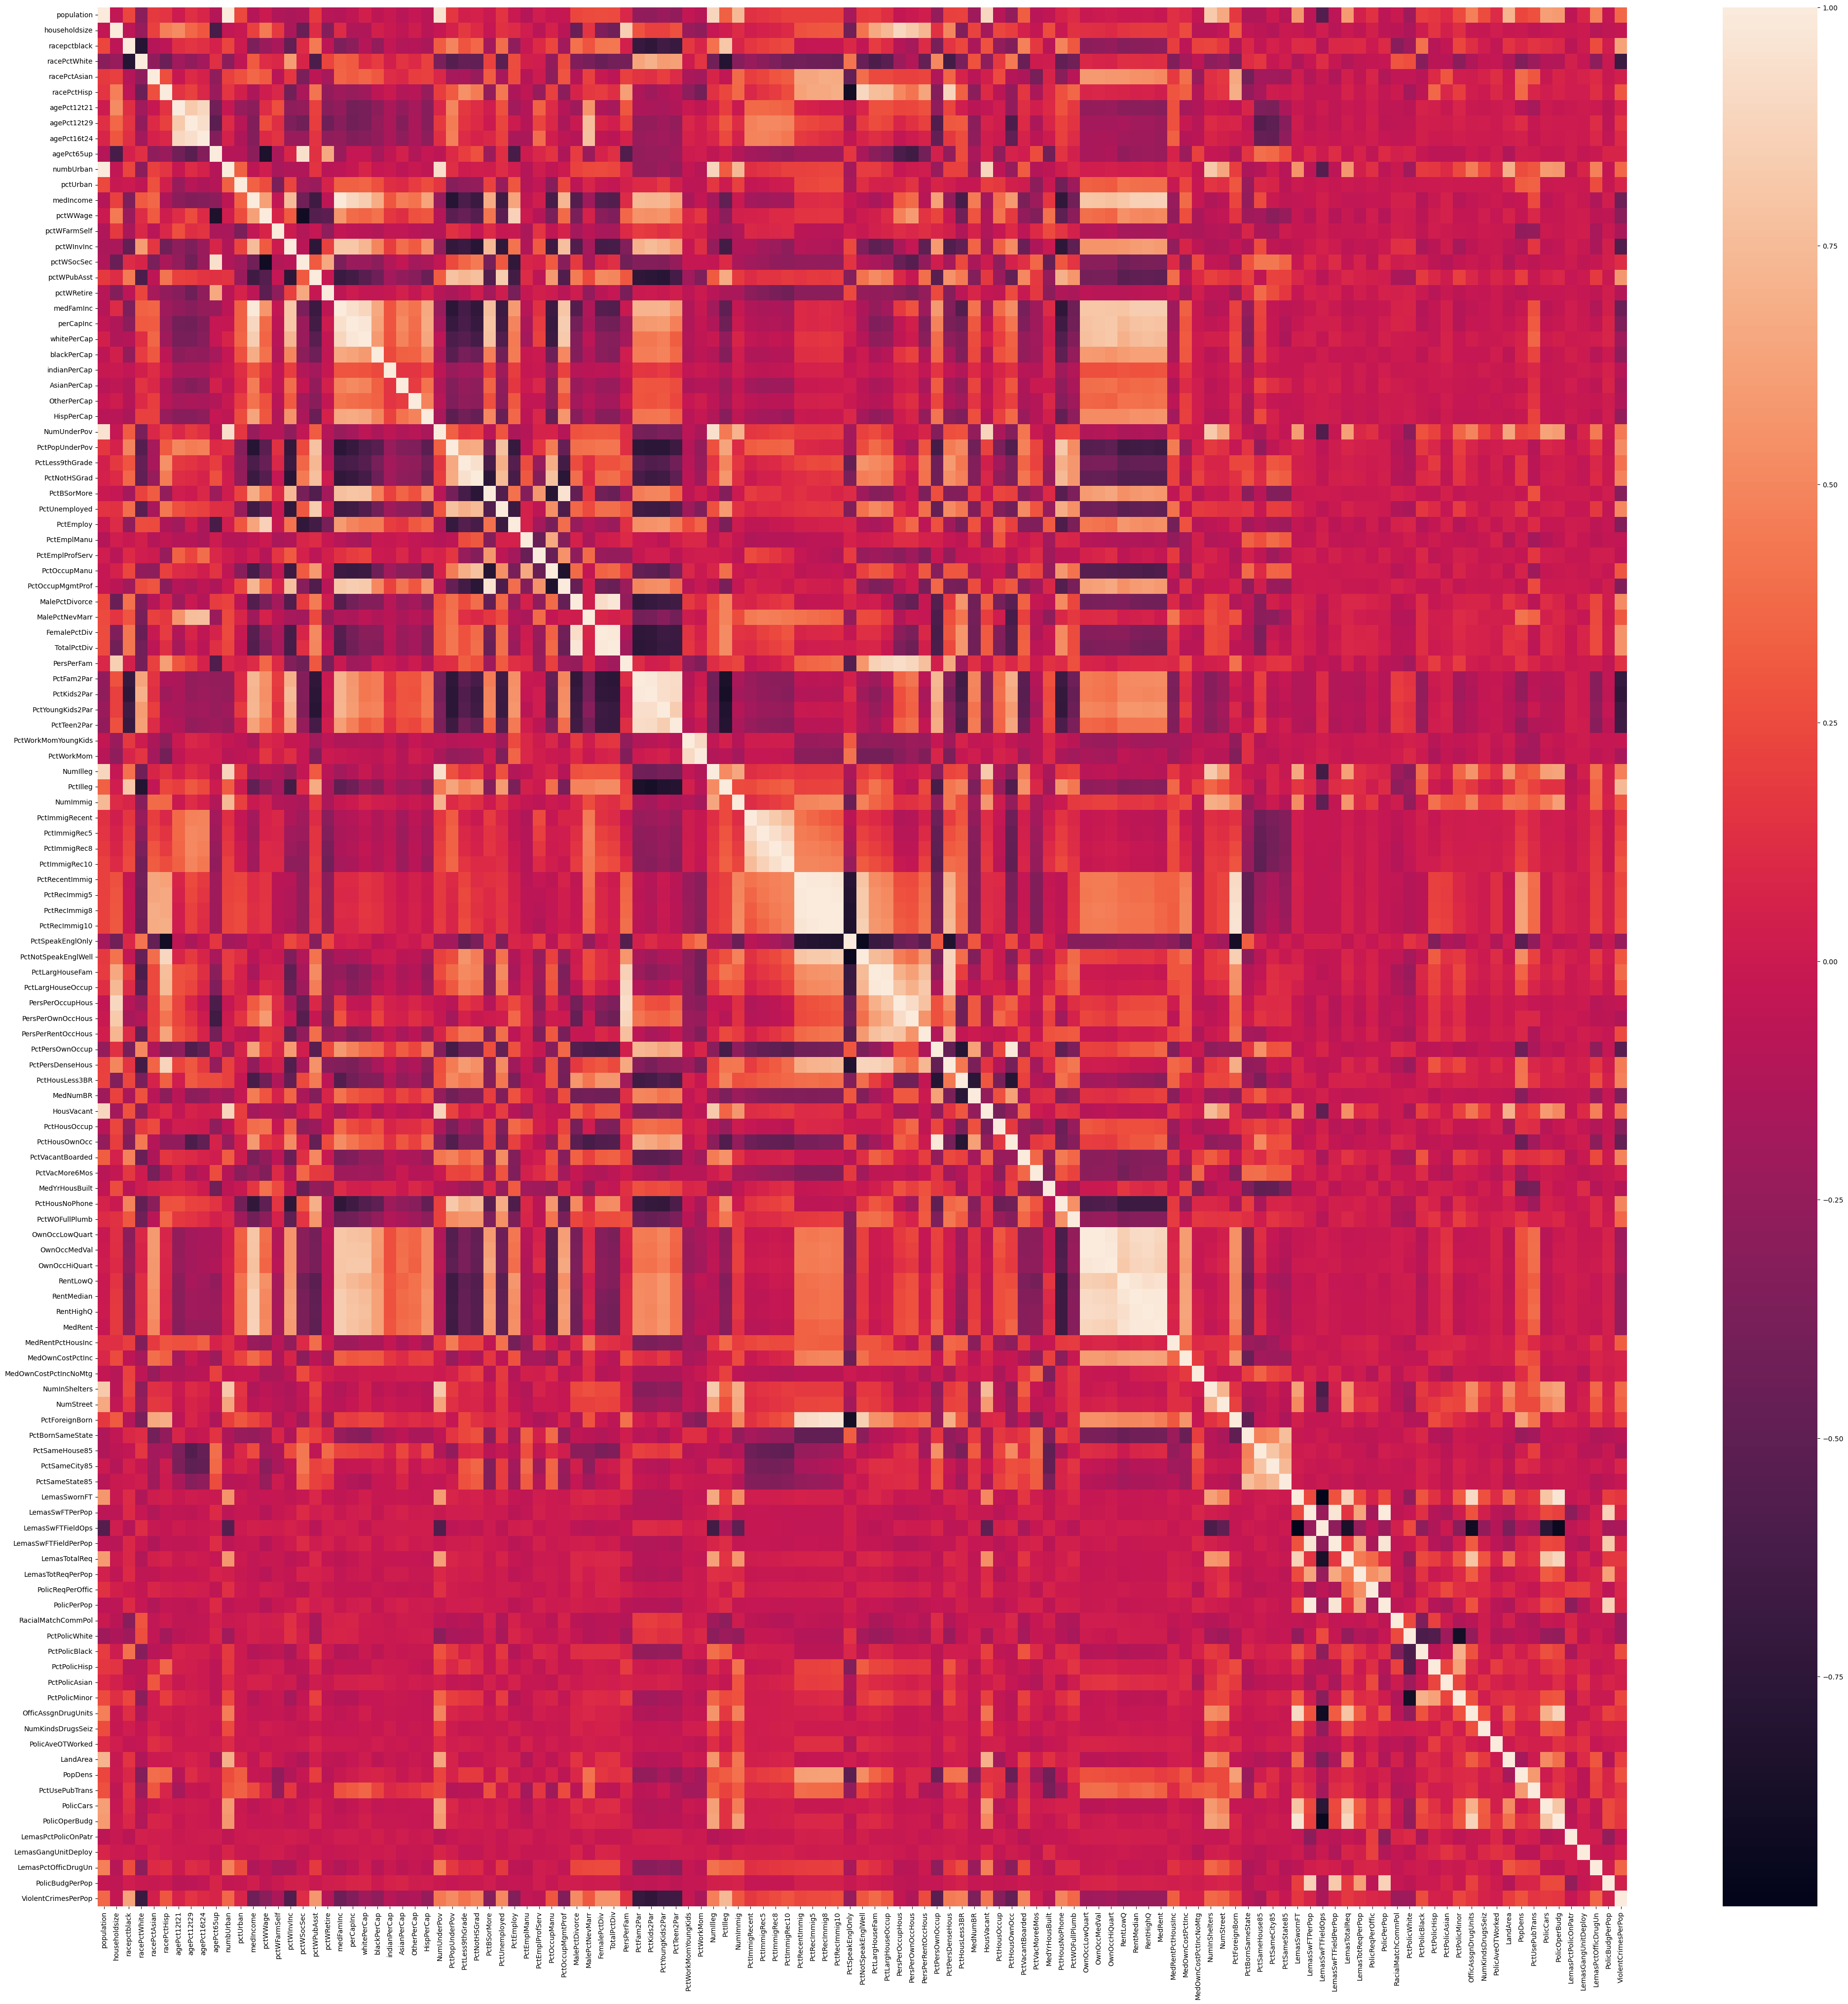

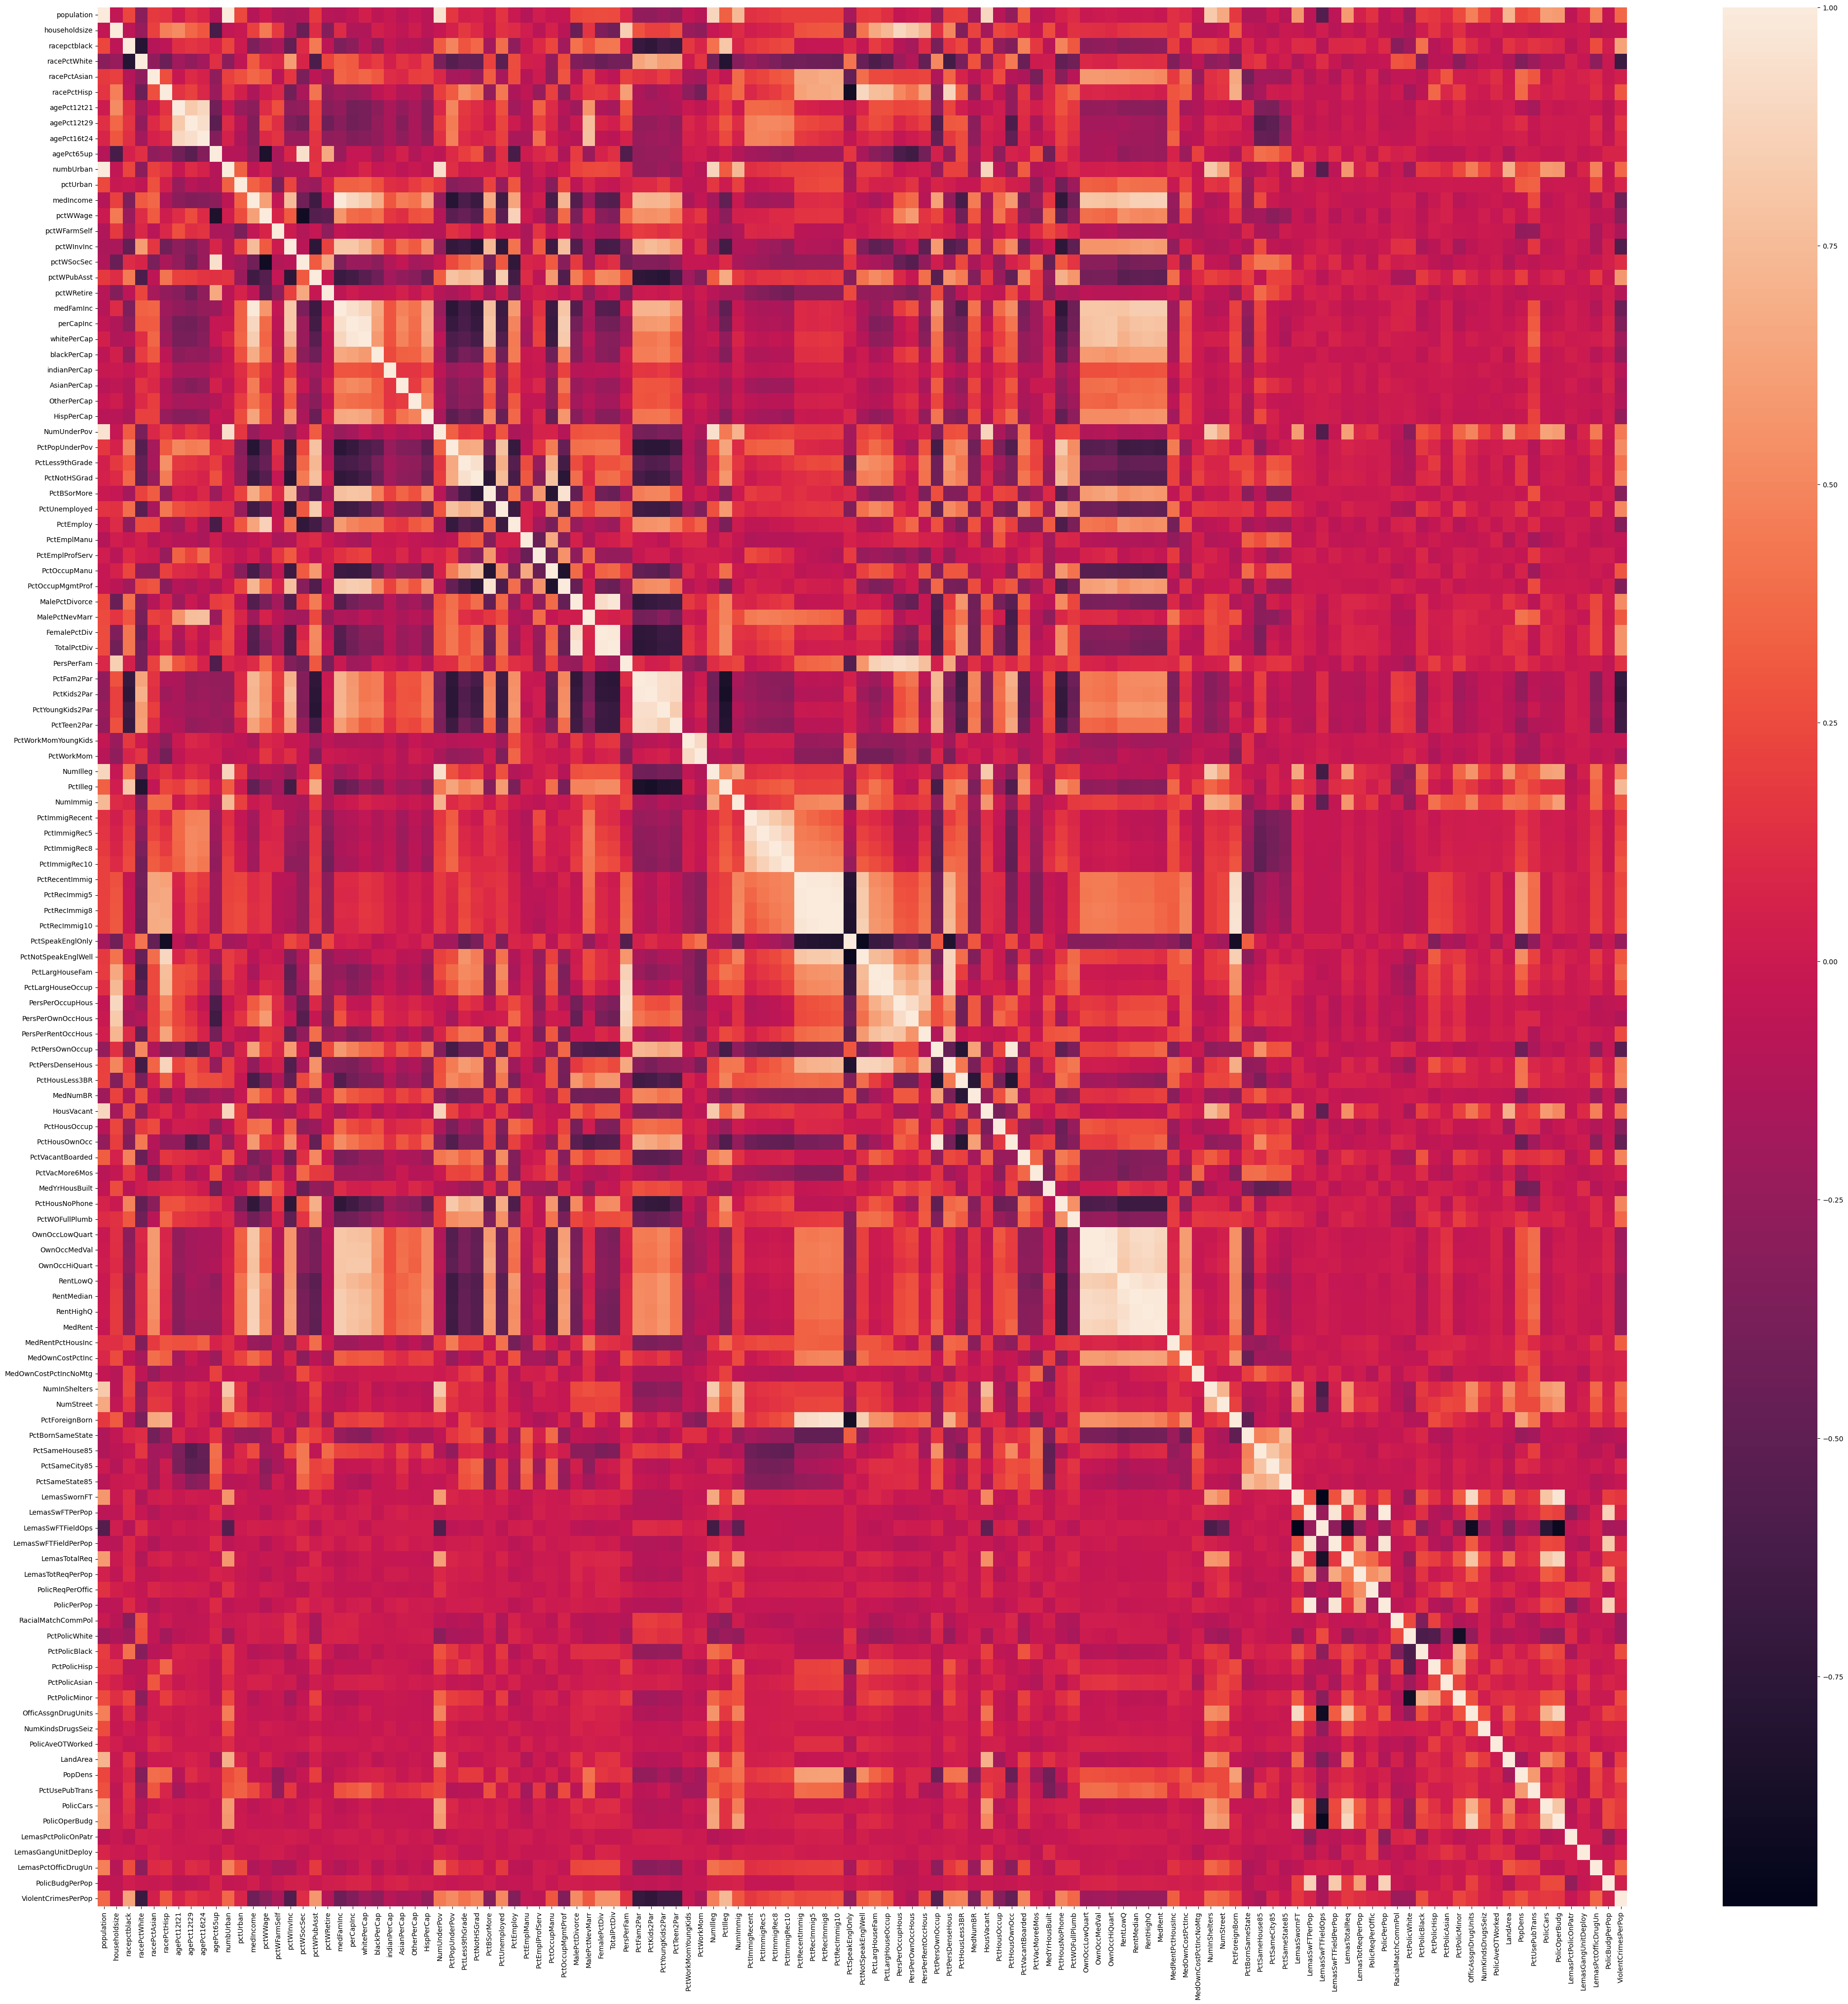

In [35]:
corr = new_cd.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(corr)

### (d) Calculate the Coefficient of Variation CV

In [36]:
CV={}
for i in new_cd.columns:
    s=new_cd[i].std()
    m=new_cd[i].mean()
    cv=s/m
    CV[i]=cv
CV

{'population': 2.203502536390986,
 'householdsize': 0.35329830186831085,
 'racepctblack': 1.4109203963756776,
 'racePctWhite': 0.3237815624993437,
 'racePctAsian': 1.359162193822209,
 'racePctHisp': 1.614277791710681,
 'agePct12t21': 0.36583986883972347,
 'agePct12t29': 0.29069288841904156,
 'agePct16t24': 0.49516051436542746,
 'agePct65up': 0.423441708890262,
 'numbUrban': 2.0017436381957654,
 'pctUrban': 0.638848871211366,
 'medIncome': 0.5797533935755999,
 'pctWWage': 0.32771005860606145,
 'pctWFarmSelf': 0.7000301156104909,
 'pctWInvInc': 0.3592399472234057,
 'pctWSocSec': 0.36851263032540105,
 'pctWPubAsst': 0.6990305042033651,
 'pctWRetire': 0.349639082857585,
 'medFamInc': 0.52773188534208,
 'perCapInc': 0.5456334284191457,
 'whitePerCap': 0.507552190721404,
 'blackPerCap': 0.5894690036844632,
 'indianPerCap': 0.8096850868666159,
 'AsianPerCap': 0.6061938508790912,
 'OtherPerCap': 0.6706480702030867,
 'HispPerCap': 0.47395971860747926,
 'NumUnderPov': 2.3049697148522097,
 'PctPo

{'population': 2.203502536390986,
 'householdsize': 0.35329830186831085,
 'racepctblack': 1.4109203963756776,
 'racePctWhite': 0.3237815624993437,
 'racePctAsian': 1.359162193822209,
 'racePctHisp': 1.614277791710681,
 'agePct12t21': 0.36583986883972347,
 'agePct12t29': 0.29069288841904156,
 'agePct16t24': 0.49516051436542746,
 'agePct65up': 0.423441708890262,
 'numbUrban': 2.0017436381957654,
 'pctUrban': 0.638848871211366,
 'medIncome': 0.5797533935755999,
 'pctWWage': 0.32771005860606145,
 'pctWFarmSelf': 0.7000301156104909,
 'pctWInvInc': 0.3592399472234057,
 'pctWSocSec': 0.36851263032540105,
 'pctWPubAsst': 0.6990305042033651,
 'pctWRetire': 0.349639082857585,
 'medFamInc': 0.52773188534208,
 'perCapInc': 0.5456334284191457,
 'whitePerCap': 0.507552190721404,
 'blackPerCap': 0.5894690036844632,
 'indianPerCap': 0.8096850868666159,
 'AsianPerCap': 0.6061938508790912,
 'OtherPerCap': 0.6706480702030867,
 'HispPerCap': 0.47395971860747926,
 'NumUnderPov': 2.3049697148522097,
 'PctPo

### (e) Scatter plots and box plots for highest CV features

In [37]:
top_feat=math.floor(np.sqrt(128))
sort_CV={k: v for k, v in sorted(CV.items(), key=lambda item: item[1])}
top_features_list=[x for x in list(sort_CV)[-top_feat:]]
top_features_list.reverse()

In [38]:
cd_top_feat=new_cd[top_features_list]
cd_train_top=train1[top_features_list]
cd_test_top=test1[top_features_list]
cd_top_feat

NumStreet  NumInShelters  NumIlleg  NumImmig  LemasPctOfficDrugUn  \
0          0.00           0.04      0.04      0.03                 0.32   
1          0.00           0.00      0.00      0.01                 0.00   
2          0.00           0.00      0.01      0.00                 0.00   
3          0.00           0.00      0.03      0.02                 0.00   
4          0.00           0.00      0.00      0.00                 0.00   
...         ...            ...       ...       ...                  ...   
1989       0.00           0.00      0.00      0.01                 0.00   
1990       0.00           0.01      0.03      0.05                 0.00   
1991       0.02           0.06      0.13      0.06                 0.91   
1992       0.01           0.04      0.02      0.06                 0.22   
1993       0.08           0.08      0.11      0.20                 1.00   

      NumUnderPov  population  numbUrban  HousVacant  LandArea  racePctHisp  
0            0.08        0.19       0.20        0.21      0.12         0.17  
1            0.01        0.00       0.02        0.02      0.02         0.07  
2            0.01        0.00       0.00        0.01      0.01         0.04  
3            0.01        0.04       0.06        0.01      0.02         0.10  
4            0.00        0.01       0.02        0.01      0.04         0.05  
...           ...         ...        ...         ...       ...          ...  
1989         0.01        0.01       0.03        0.02      0.01         0.16  
1990         0.04        0.05       0.06        0.03      0.02         0.32  
1991         0.12        0.16       0.17        0.21      0.08         0.25  
1992         0.03        0.08       0.09        0.05      0.03         0.10  
1993         0.16        0.20       0.21        0.12      0.11         0.77  

[1994 rows x 11 columns]

NumStreet  NumInShelters  NumIlleg  NumImmig  LemasPctOfficDrugUn  \
0          0.00           0.04      0.04      0.03                 0.32   
1          0.00           0.00      0.00      0.01                 0.00   
2          0.00           0.00      0.01      0.00                 0.00   
3          0.00           0.00      0.03      0.02                 0.00   
4          0.00           0.00      0.00      0.00                 0.00   
...         ...            ...       ...       ...                  ...   
1989       0.00           0.00      0.00      0.01                 0.00   
1990       0.00           0.01      0.03      0.05                 0.00   
1991       0.02           0.06      0.13      0.06                 0.91   
1992       0.01           0.04      0.02      0.06                 0.22   
1993       0.08           0.08      0.11      0.20                 1.00   

      NumUnderPov  population  numbUrban  HousVacant  LandArea  racePctHisp  
0            0.08        0.19       0.20        0.21      0.12         0.17  
1            0.01        0.00       0.02        0.02      0.02         0.07  
2            0.01        0.00       0.00        0.01      0.01         0.04  
3            0.01        0.04       0.06        0.01      0.02         0.10  
4            0.00        0.01       0.02        0.01      0.04         0.05  
...           ...         ...        ...         ...       ...          ...  
1989         0.01        0.01       0.03        0.02      0.01         0.16  
1990         0.04        0.05       0.06        0.03      0.02         0.32  
1991         0.12        0.16       0.17        0.21      0.08         0.25  
1992         0.03        0.08       0.09        0.05      0.03         0.10  
1993         0.16        0.20       0.21        0.12      0.11         0.77  

[1994 rows x 11 columns]

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

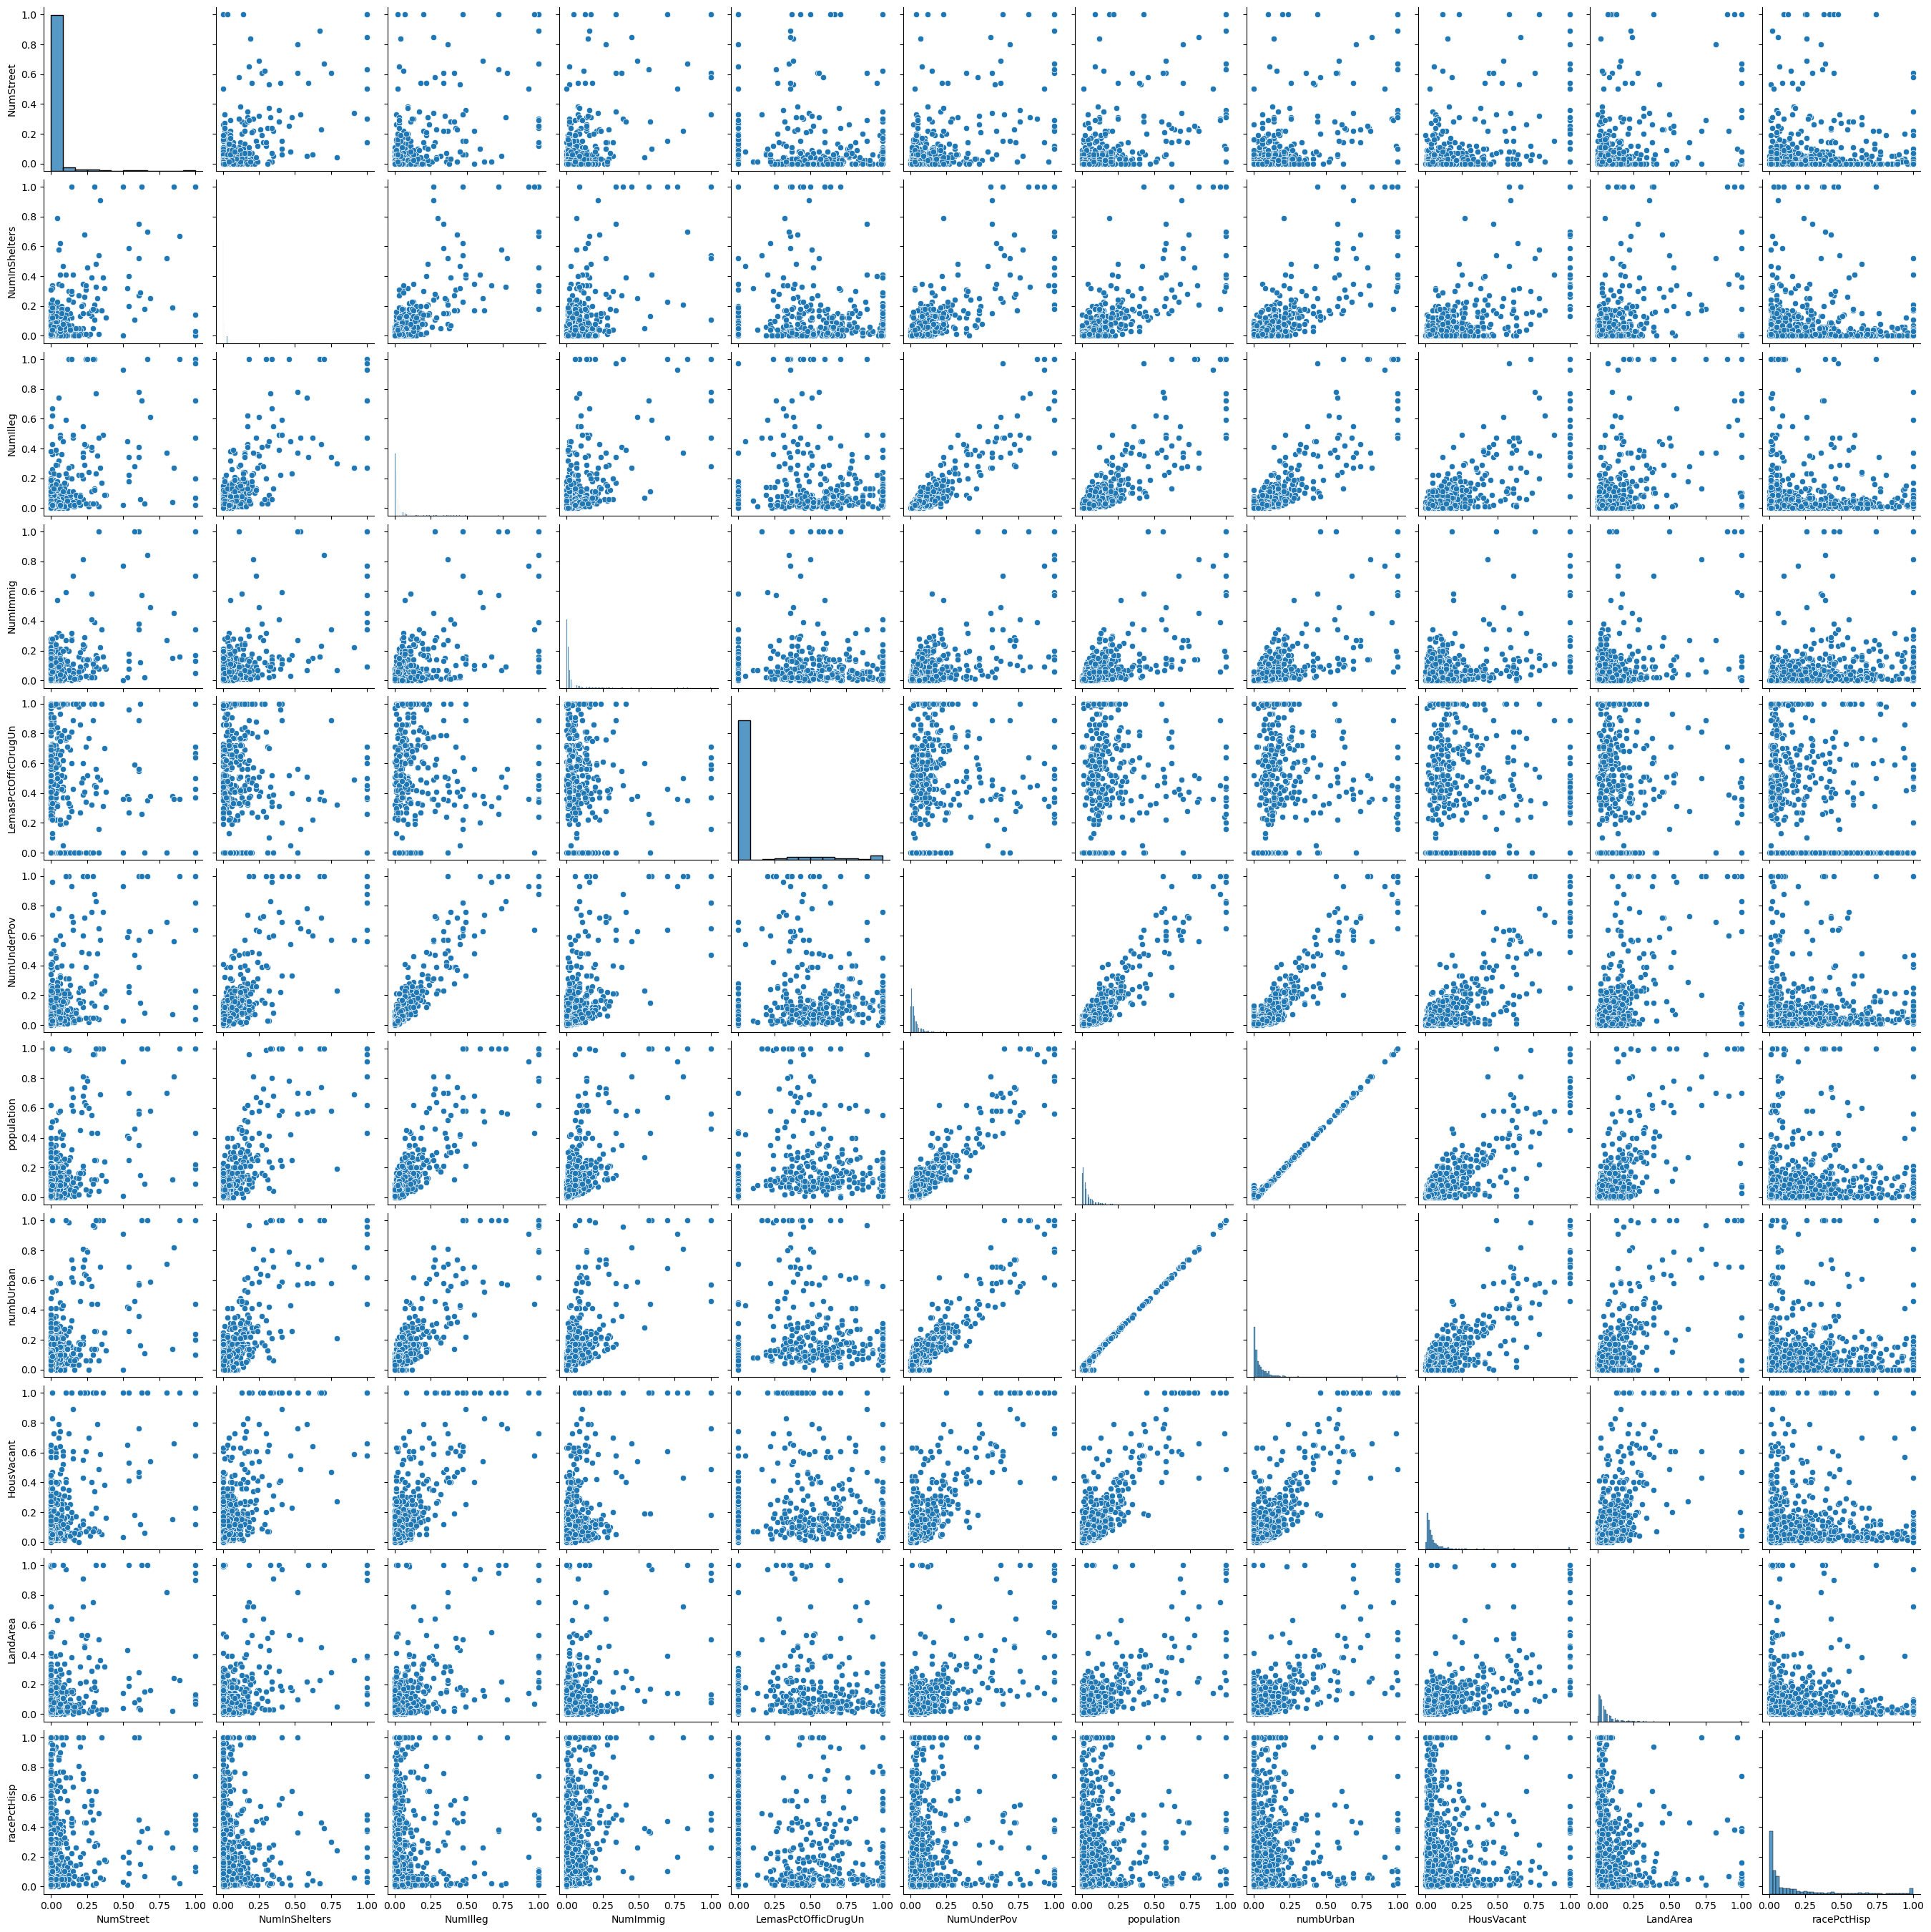

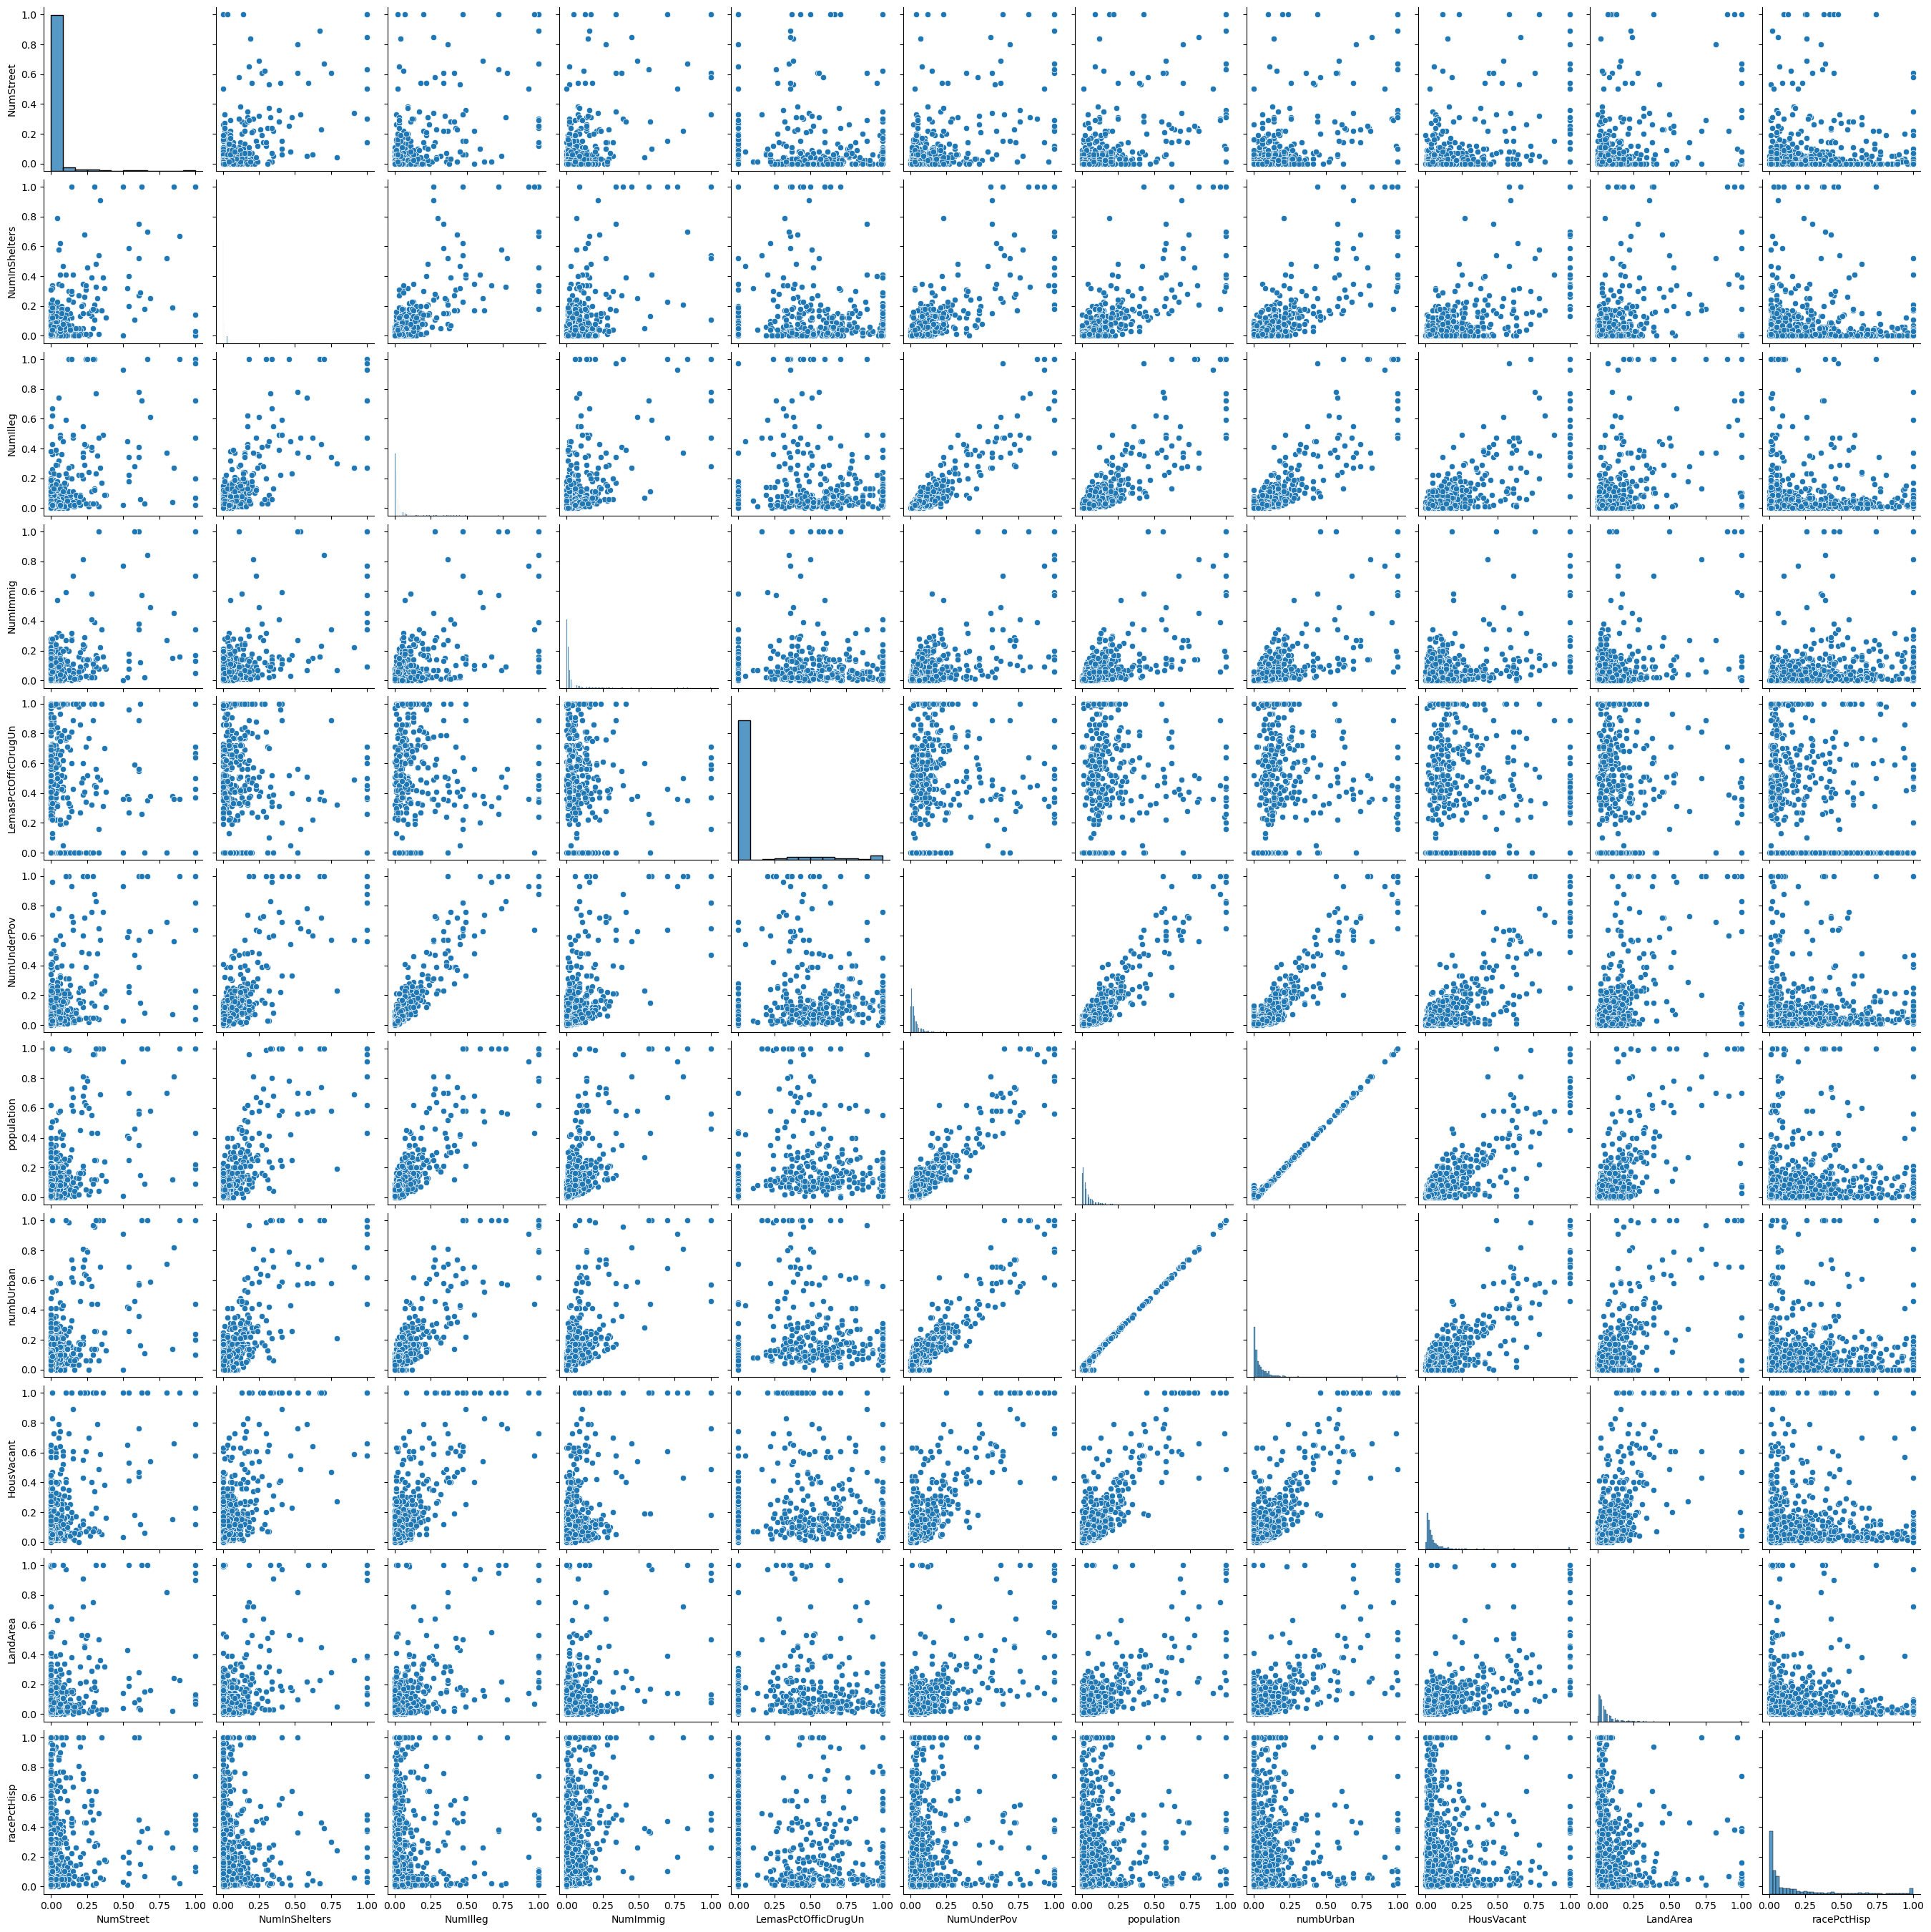

In [39]:
plt.figure(figsize=(50, 50))
sns.pairplot(cd_top_feat)
plt.show()

Some inferences can be made from the scatterplot like the features population and numbUrban are strongly related. We can also observe many features are associated.

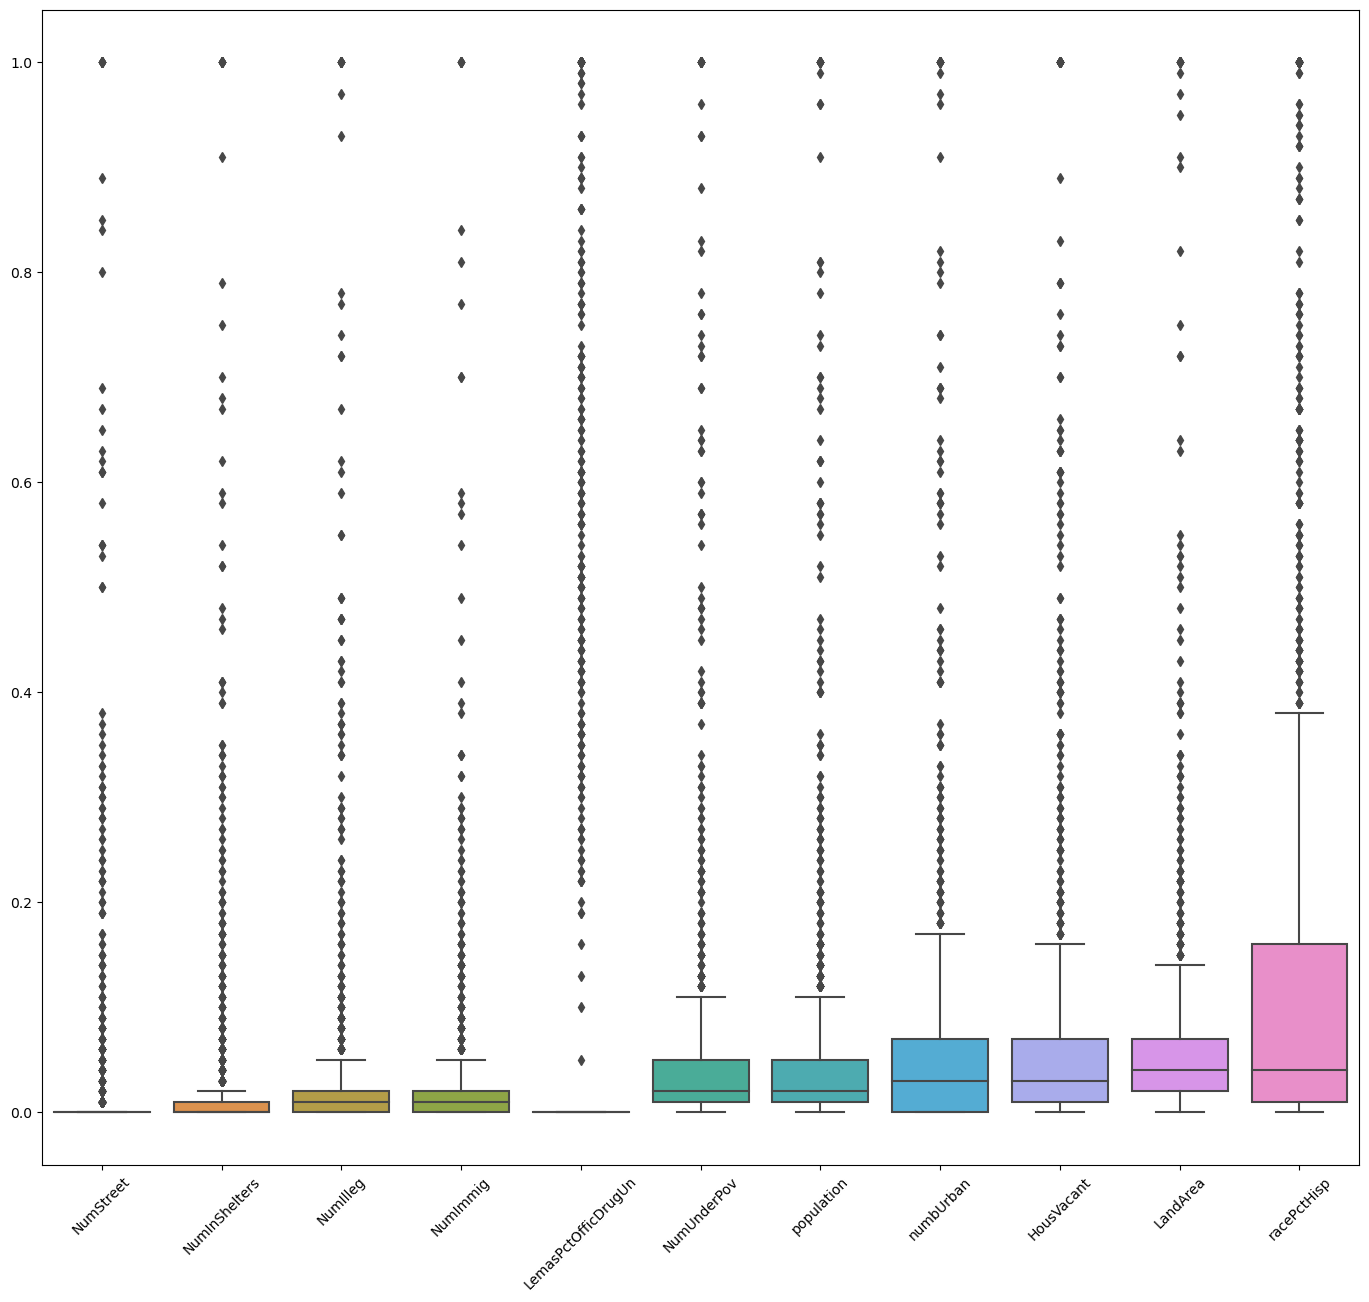

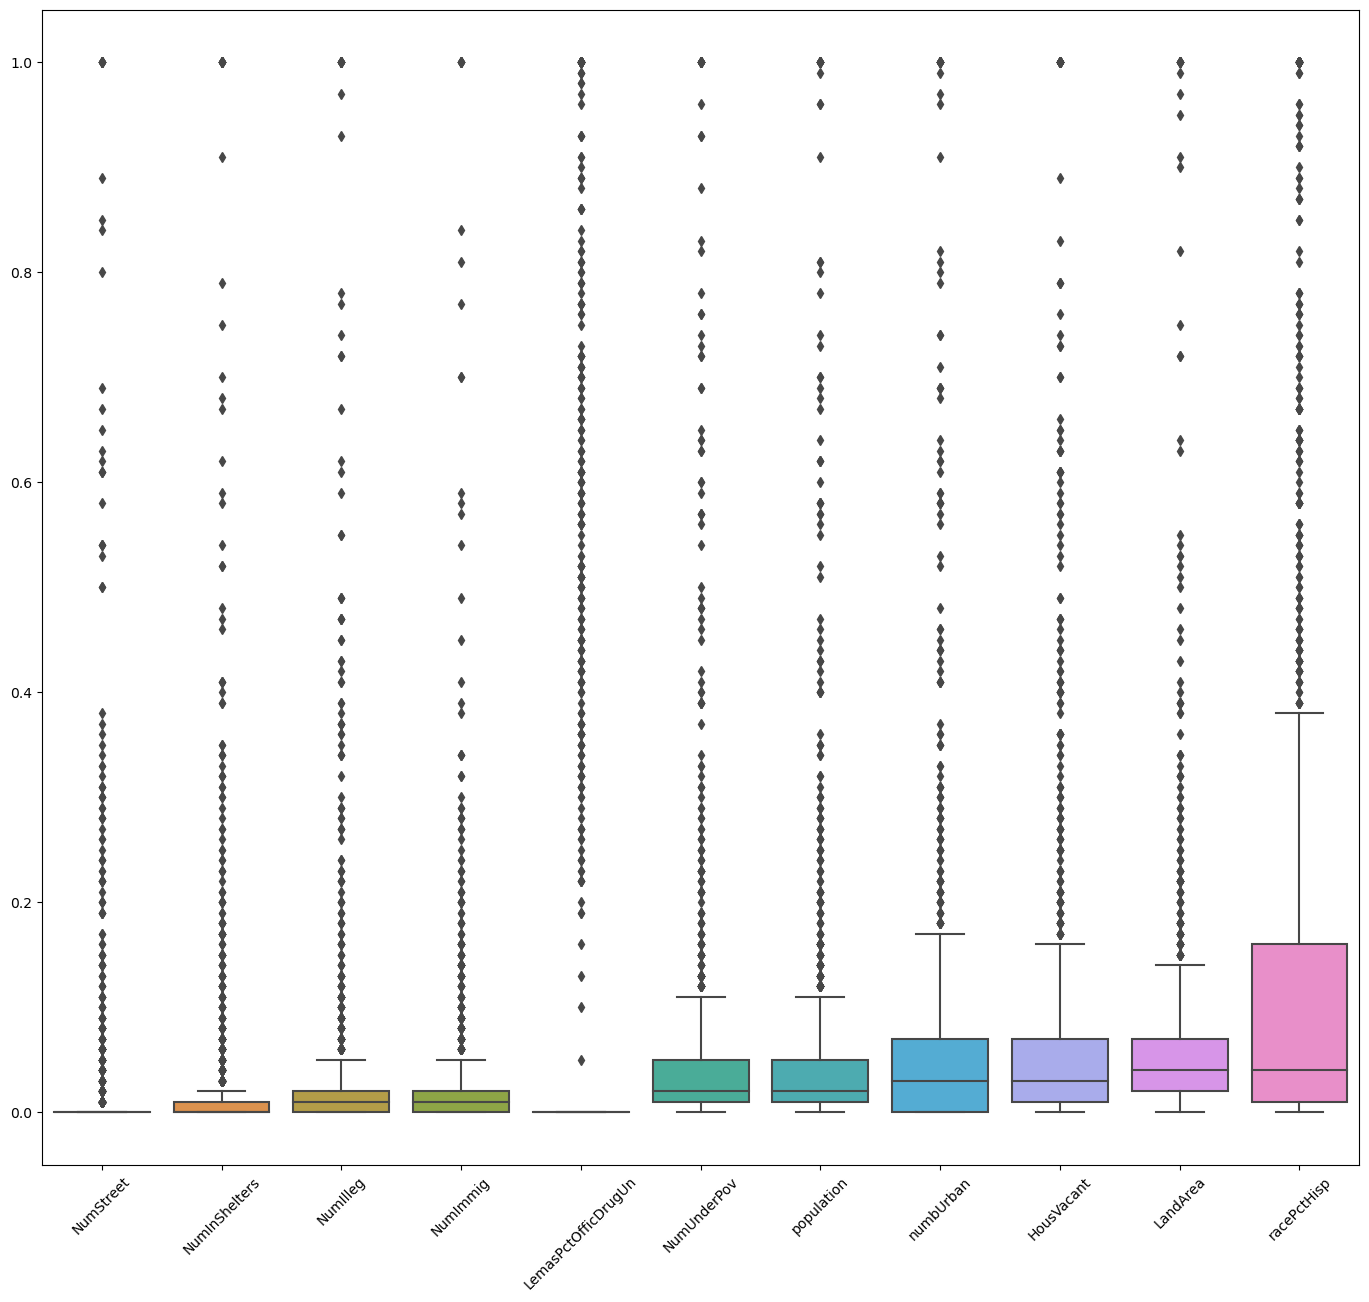

In [40]:
plt.figure(figsize=(17,15))
sns.boxplot(data=cd_top_feat)
plt.xticks(rotation = 45)
plt.show()

In [41]:
X_train=cd_train_top
y_train=train1[['ViolentCrimesPerPop']]
X_test=cd_test_top
y_test=test1[['ViolentCrimesPerPop']]
X_train1=train1.drop('ViolentCrimesPerPop', axis=1)
X_test1=test1.drop('ViolentCrimesPerPop', axis=1)
c1=X_train1.columns
print(c1)

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up',
       ...
       'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans',
       'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop'],
      dtype='object', length=122)
Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up',
       ...
       'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans',
       'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop'],
      dtype='object', length=122)


### (f) Fit a linear model

In [42]:
reg = LinearRegression().fit(X_train, y_train)
y_pred=reg.predict(X_test)
print("MSE for Test set with best features:",mean_squared_error(y_test,y_pred))

MSE for Test set with best features: 0.02925751264989082
MSE for Test set with best features: 0.02925751264989082


In [43]:
reg1=LinearRegression().fit(X_train1, y_train)
y_pred1=reg1.predict(X_test1)
print("MSE for Test set with all features:",mean_squared_error(y_test,y_pred1))

MSE for Test set with all features: 2.2220977703731606e+17
MSE for Test set with all features: 2.2220977703731606e+17


### (g) Fit a ridge regression model

In [44]:
cross_val = KFold(n_splits=5, shuffle=True, random_state=0)
rba=RidgeCV(alphas=(0.001,0.01,0.1,1,10,100),cv=cross_val)
rba.fit(X_train1,y_train)

RidgeCV(alphas=(0.001, 0.01, 0.1, 1, 10, 100),
        cv=KFold(n_splits=5, random_state=0, shuffle=True))

RidgeCV(alphas=(0.001, 0.01, 0.1, 1, 10, 100),
        cv=KFold(n_splits=5, random_state=0, shuffle=True))

In [45]:
best_alpha=rba.alpha_
print(best_alpha)

1.0
1.0


In [46]:
ridgebest=Ridge(best_alpha).fit(X_train1,y_train)
y_ridge_pred_test=ridgebest.predict(X_test1)
print("MSE for Ridge Regression Test set with all features:",mean_squared_error(y_test,y_ridge_pred_test))

MSE for Ridge Regression Test set with all features: 0.01772373712282781
MSE for Ridge Regression Test set with all features: 0.01772373712282781


### (h) Fit a LASSO model

In [47]:
lasso_reg = LassoCV(cv=cross_val,alphas=(0.001,0.01,0.1,1,10,100))
lasso_reg.fit(X_train1, y_train)

/Users/payalrashinkar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=(0.001, 0.01, 0.1, 1, 10, 100),
        cv=KFold(n_splits=5, random_state=0, shuffle=True))

/Users/payalrashinkar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=(0.001, 0.01, 0.1, 1, 10, 100),
        cv=KFold(n_splits=5, random_state=0, shuffle=True))

In [48]:
best_alpha_lasso=lasso_reg.alpha_
best_alpha_lasso

0.001

0.001

In [49]:
lasso_clf=Lasso(alpha=best_alpha_lasso).fit(X_train1,y_train)
y_lasso_pred_test=lasso_clf.predict(X_test1)
print("MSE for Lasso Regression Test set with all features:",mean_squared_error(y_test,y_lasso_pred_test))
print('Number of variables selected by the model: ', len(np.nonzero(lasso_clf.coef_)[0]))
print('\nThe list of the variables selected by the model: \n',X_train1.iloc[:, np.ndarray.tolist(np.nonzero(lasso_clf.coef_)[0])].columns)

MSE for Lasso Regression Test set with all features: 0.017534463993660966
Number of variables selected by the model:  23

The list of the variables selected by the model: 
 Index(['racepctblack', 'racePctWhite', 'agePct12t29', 'pctUrban',
       'pctWPubAsst', 'AsianPerCap', 'MalePctDivorce', 'PctKids2Par',
       'PctYoungKids2Par', 'PctWorkMom', 'PctIlleg', 'PctRecImmig10',
       'PctPersDenseHous', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded',
       'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumStreet',
       'PctForeignBorn', 'PctSameCity85', 'LemasGangUnitDeploy',
       'LemasPctOfficDrugUn'],
      dtype='object')
MSE for Lasso Regression Test set with all features: 0.017534463993660966
Number of variables selected by the model:  23

The list of the variables selected by the model: 
 Index(['racepctblack', 'racePctWhite', 'agePct12t29', 'pctUrban',
       'pctWPubAsst', 'AsianPerCap', 'MalePctDivorce', 'PctKids2Par',
       'PctYoungKids2Par', 'PctWorkMom', 'PctIlleg'

In [50]:
scaler = StandardScaler()
X_train_std=pd.DataFrame(scaler.fit_transform(X_train1))
X_test_std=pd.DataFrame(scaler.fit_transform(X_test1))

In [51]:
lasso_reg_std = LassoCV(alphas=[0.001,0.01,0.1,1,10,100], cv=cross_val).fit(X_train_std, y_train)
lasso_clf_std=Lasso(alpha=lasso_reg_std.alpha_)
lasso_clf_std.fit(X_train_std,y_train)
y_lasso_std_pred_test=lasso_clf.predict(X_test_std)
print("MSE for Lasso Regression Test set with standardized features:",mean_squared_error(y_test,y_lasso_std_pred_test))
print('Number of variables selected by the model: ', len(np.nonzero(lasso_clf_std.coef_)[0]))
print('\nThe list of the variables selected by the model: \n',X_train1.iloc[:, np.ndarray.tolist(np.nonzero(lasso_clf_std.coef_)[0])].columns)

MSE for Lasso Regression Test set with standardized features: 0.49317060296595794
Number of variables selected by the model:  68

The list of the variables selected by the model: 
 Index(['racepctblack', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage',
       'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire',
       'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
       'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade',
       'PctEmploy', 'PctEmplManu', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec5',
       'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant',
       'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctWOFullPlumb', 'RentLowQ', 'MedRent', 'MedRentPctHousInc',
       'Me

/Users/payalrashinkar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/payalrashinkar/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  # that has no feature names.


MSE for Lasso Regression Test set with standardized features: 0.49317060296595794
Number of variables selected by the model:  68

The list of the variables selected by the model: 
 Index(['racepctblack', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage',
       'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire',
       'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
       'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade',
       'PctEmploy', 'PctEmplManu', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec5',
       'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant',
       'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctWOFullPlumb', 'RentLowQ', 'MedRent', 'MedRentPctHousInc',
       'Me

/Users/payalrashinkar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/payalrashinkar/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  # that has no feature names.


#### We can see that test error with raw features is less than test error with standardized features

### (i) Fit a PCR model

In [52]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train1)
lin_reg = LinearRegression()
mse = []
for i in range(1, X_train_pca.shape[1]+1):
    mse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pca[:,:i], # Use first k principal components
                                      y_train, 
                                      scoring='neg_mean_squared_error').mean()
    mse.append(mse_score)


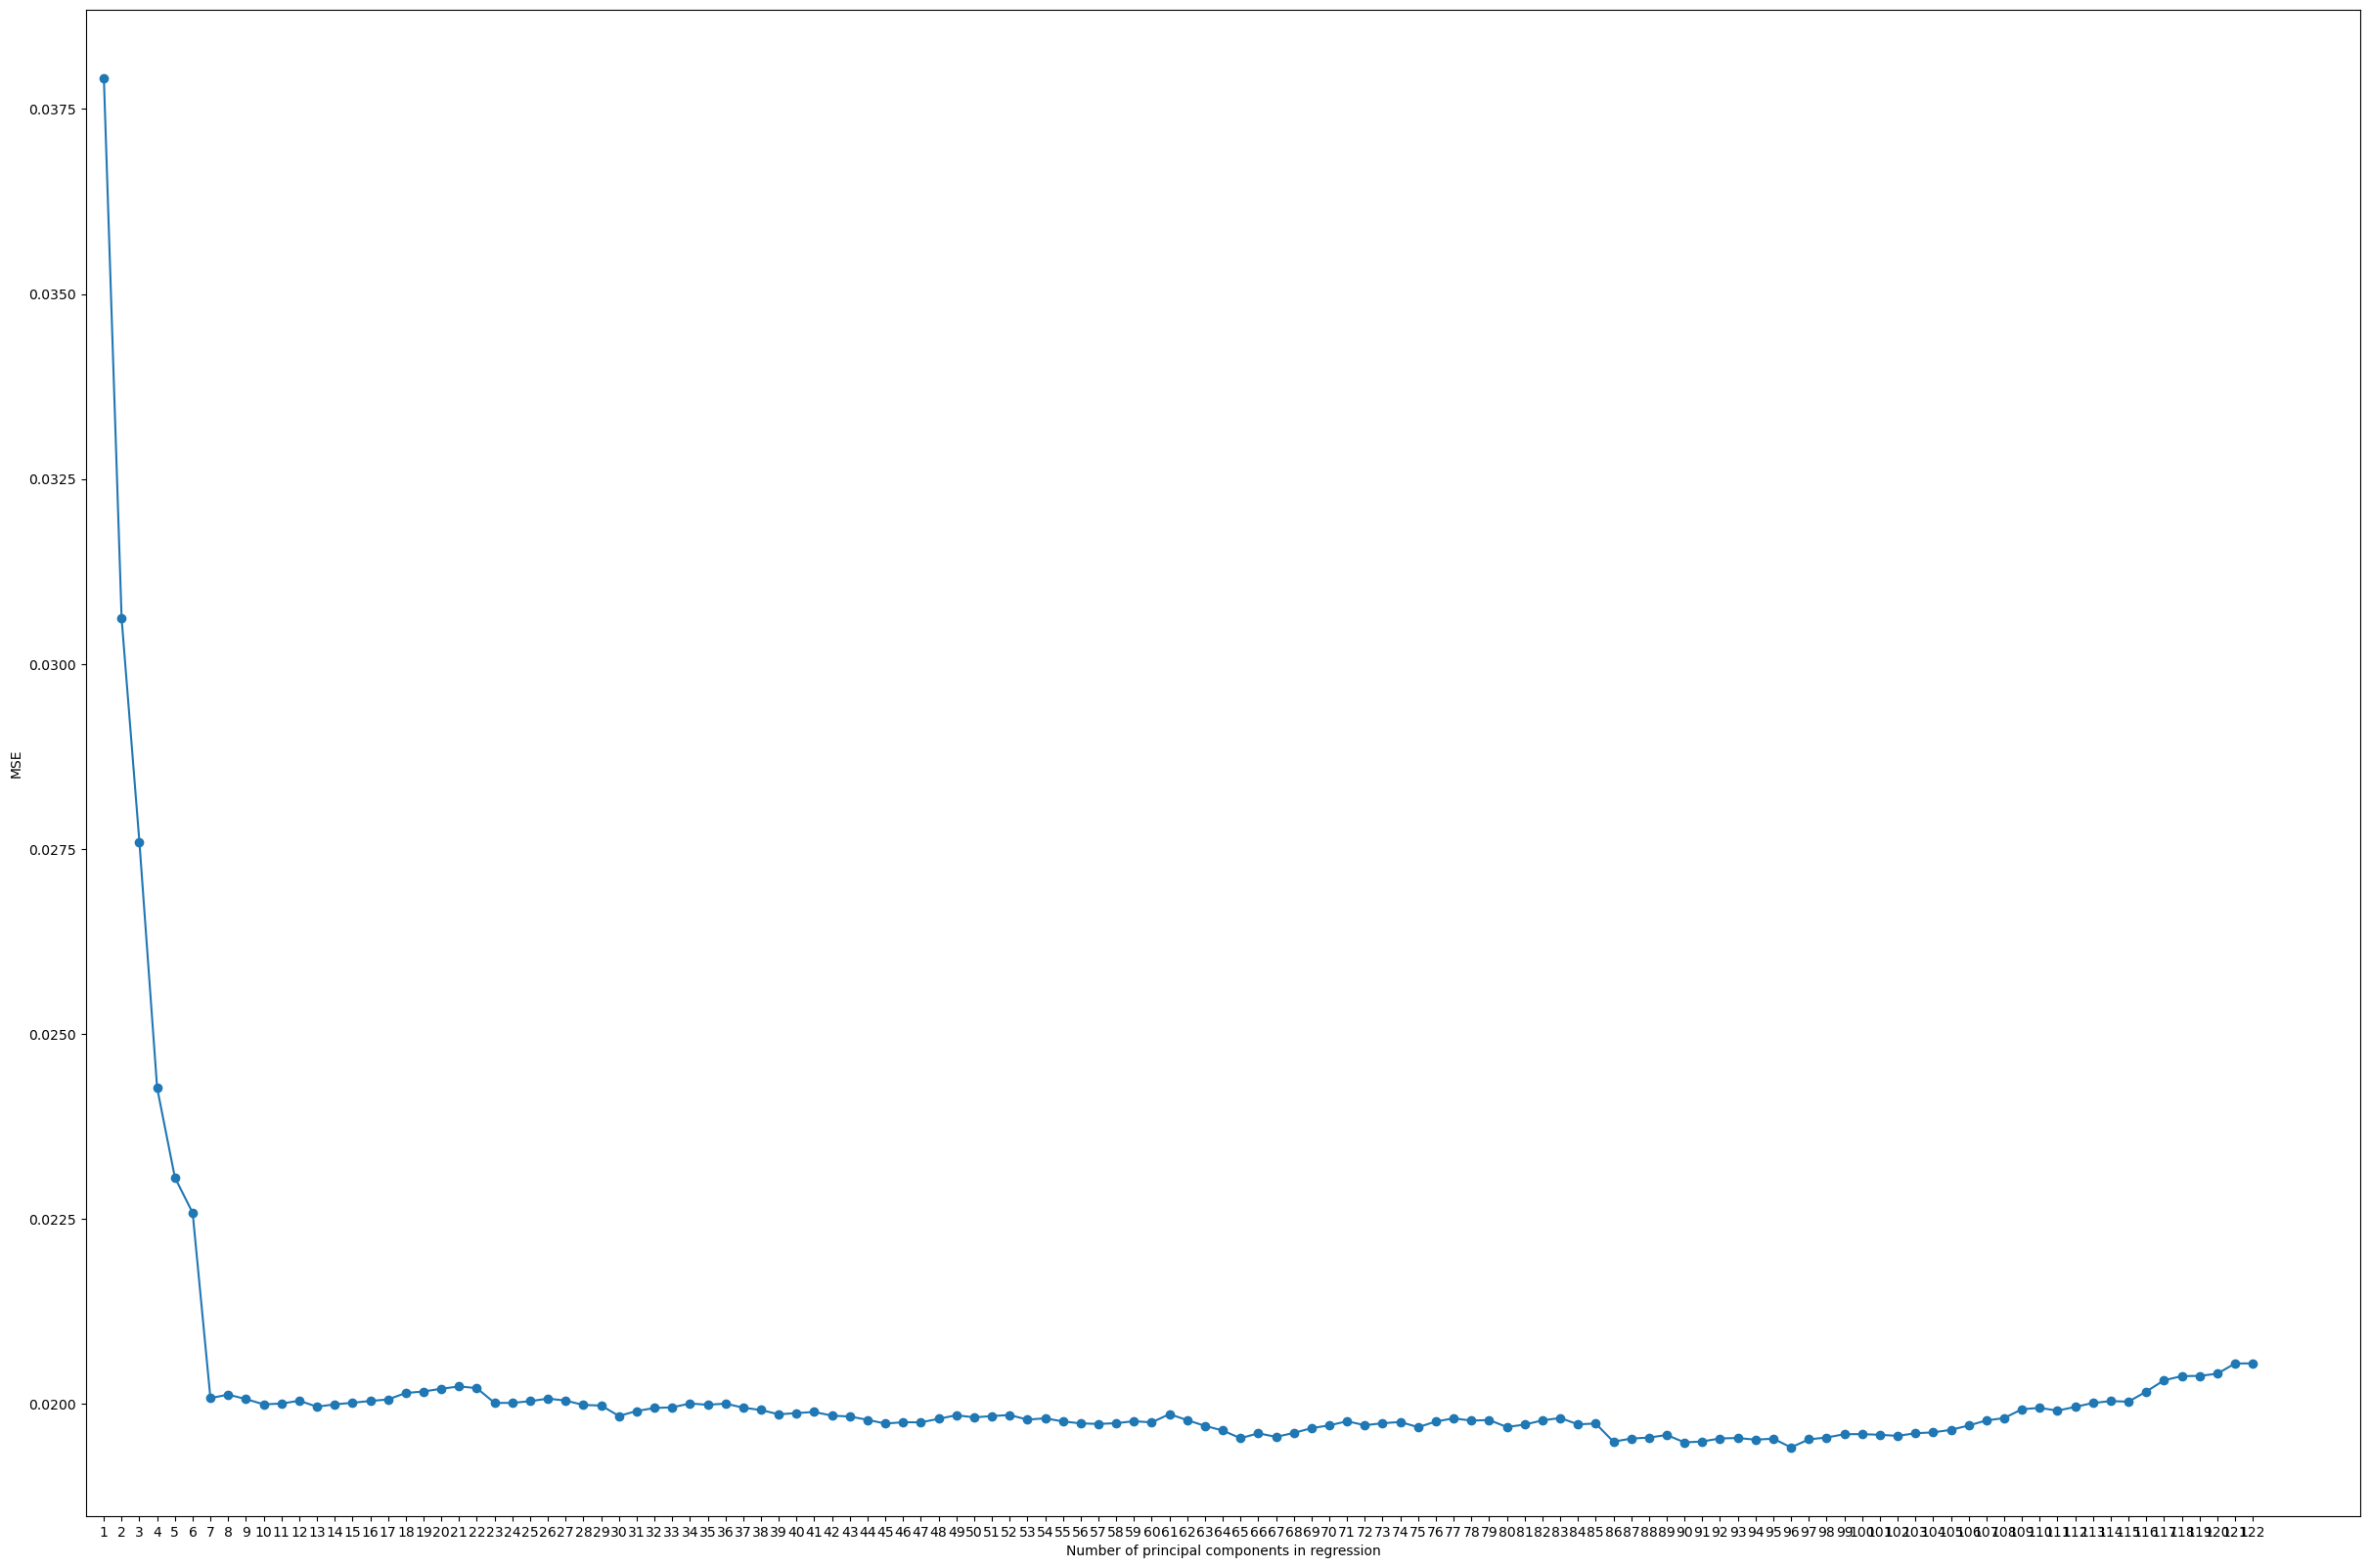

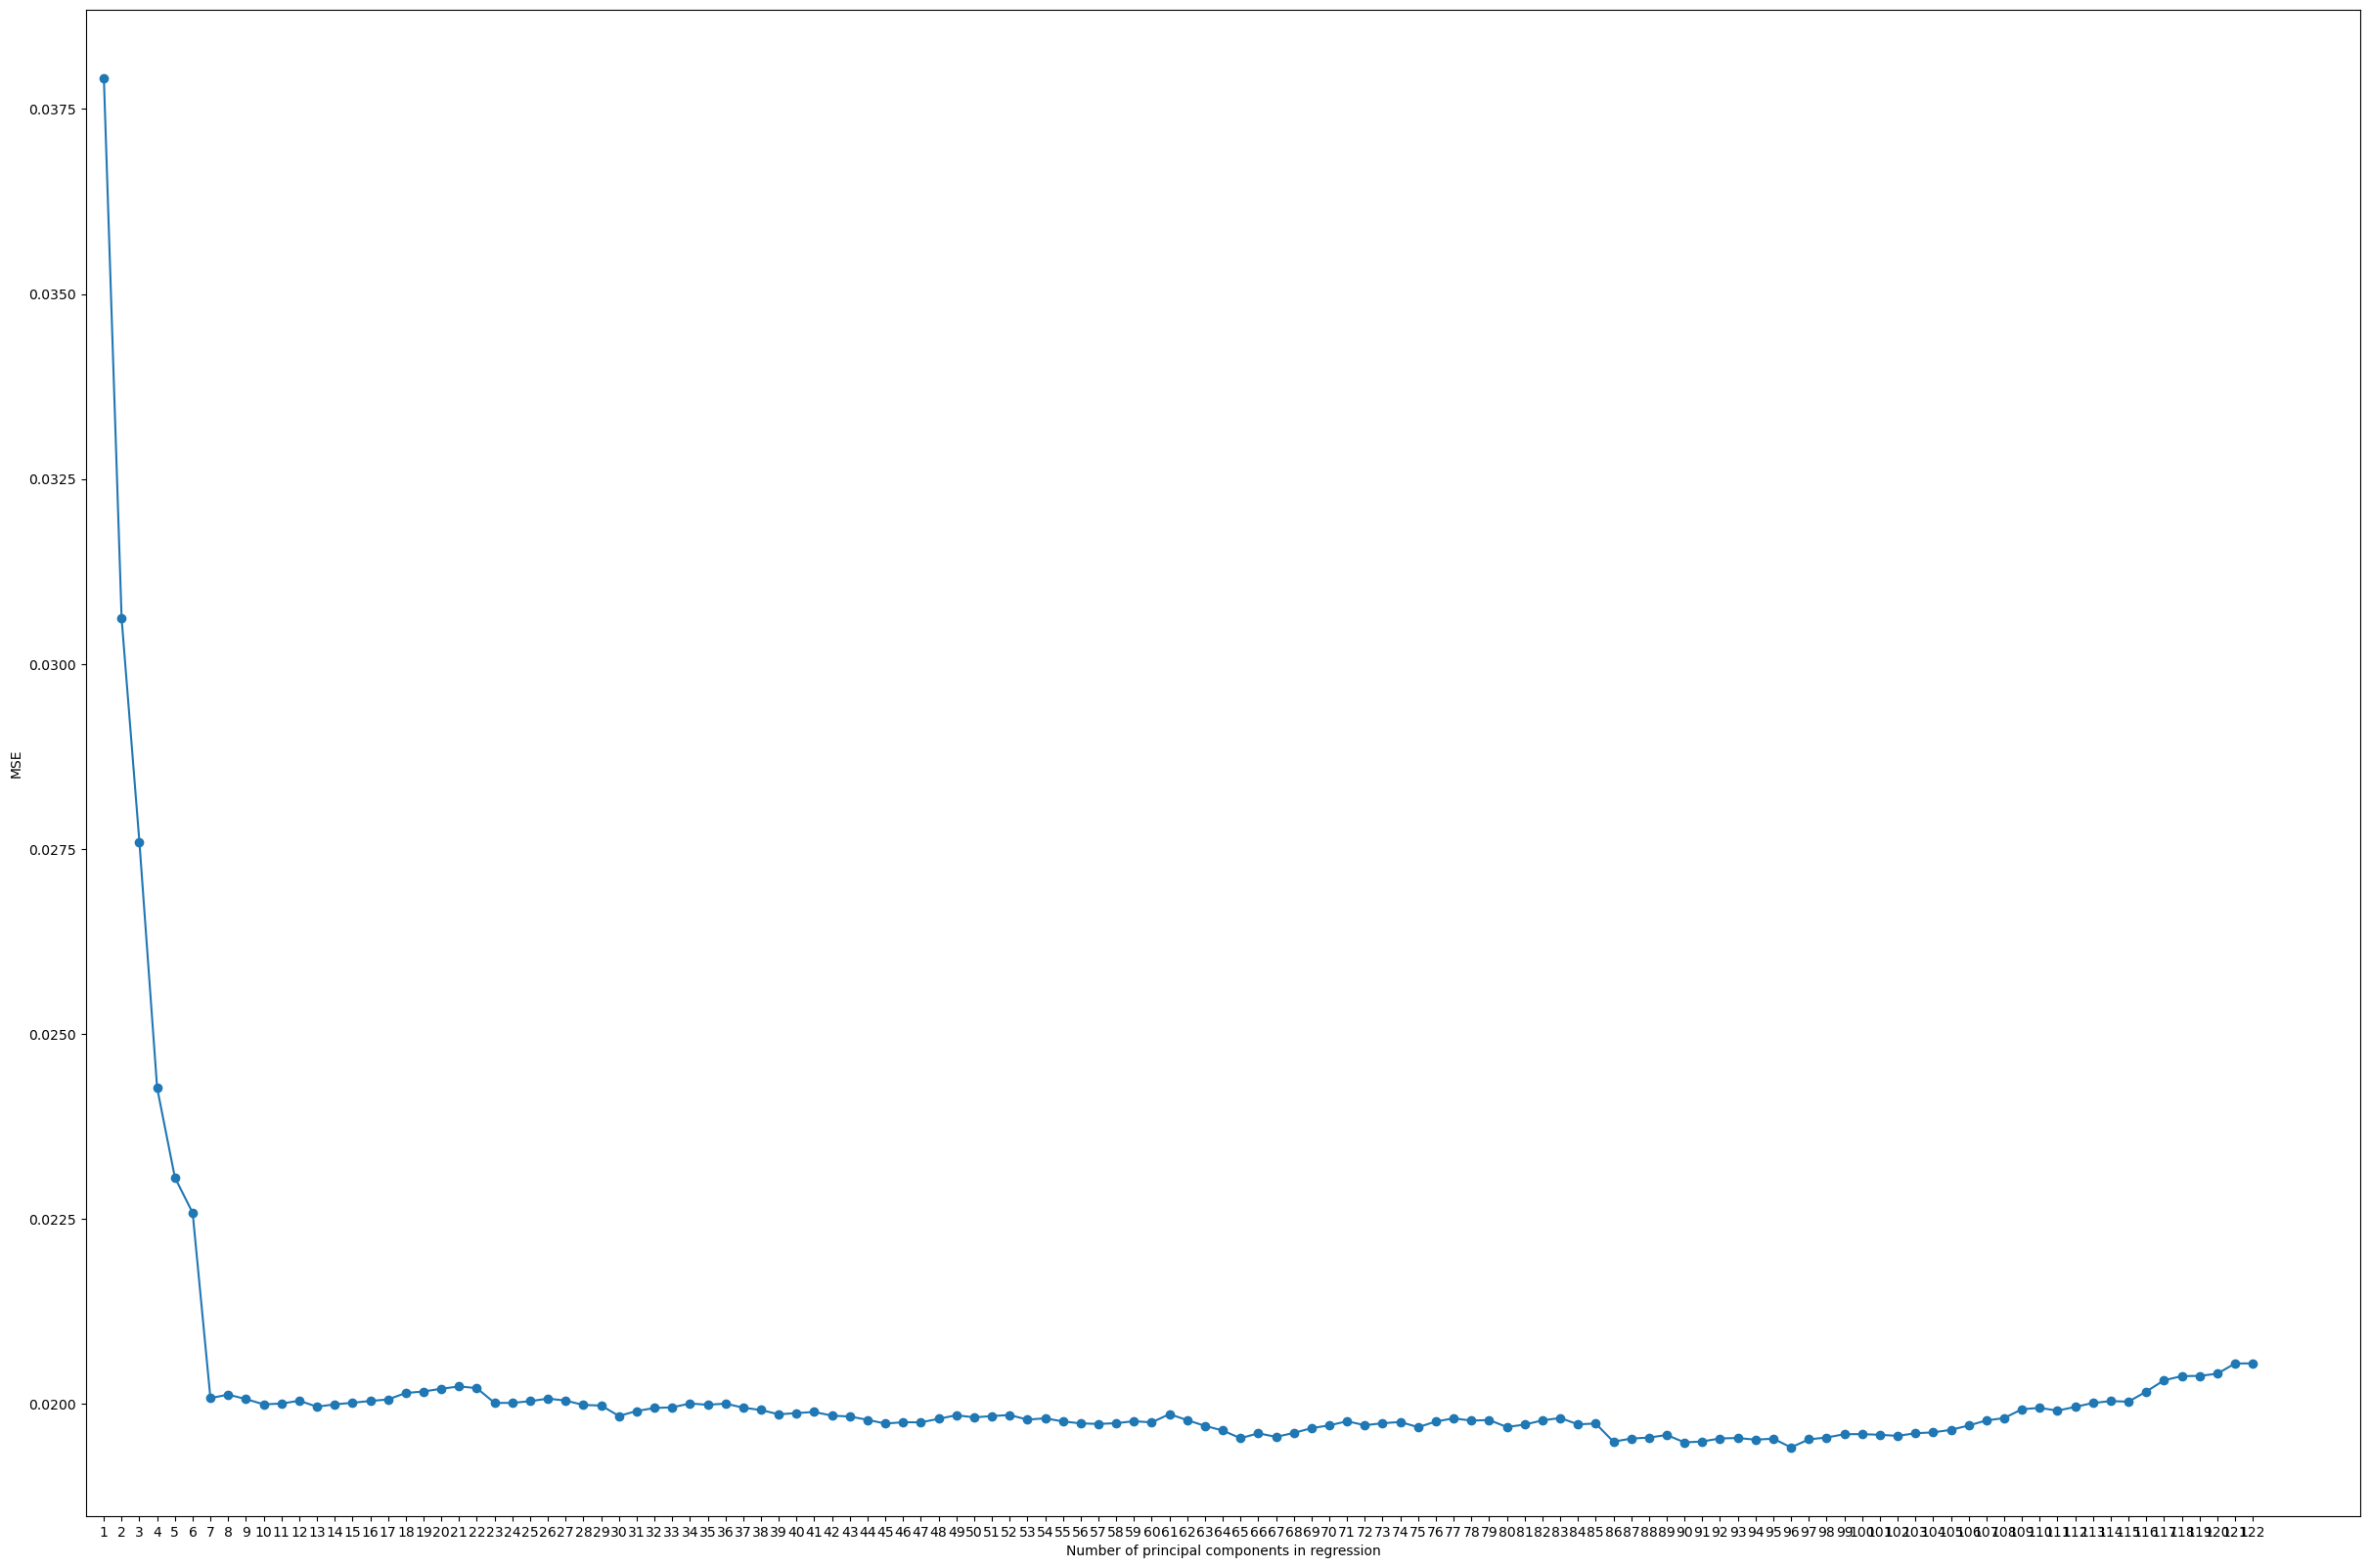

In [53]:
plt.figure(figsize=[30,20])
plt.plot(mse, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pca.shape[1]), np.arange(1, X_train_pca.shape[1]+1))
plt.show()

In [54]:
print('The number of principal components that gives minimum MSE is: ', mse.index(min(mse))+1)

The number of principal components that gives minimum MSE is:  96
The number of principal components that gives minimum MSE is:  96


In [55]:
best_pca_numf = mse.index(min(mse))+1
lin_reg_pca = LinearRegression().fit(X_train_pca[:,:best_pca_numf], y_train)

X_test_pca = pca.transform(X_test1)[:,:best_pca_numf]

predsw = lin_reg_pca.predict(X_train_pca[:,:best_pca_numf])
preds = lin_reg_pca.predict(X_test_pca)
pcr_score_train = mean_squared_error(y_train, predsw)
pcr_score_test = mean_squared_error(y_test, preds)

print('Train MSE: ',pcr_score_train)
print('Test MSE: ',pcr_score_test)

Train MSE:  0.016605995098348383
Test MSE:  0.018445086212504347
Train MSE:  0.016605995098348383
Test MSE:  0.018445086212504347


### (j) Fit a boosting tree

In [56]:
print("Finding the optimal Alpha\n")
xr = xgboost.XGBRegressor(objective='reg:squarederror')
parameters={'reg_alpha': (0.001,0.01,0.1,1,10,100), 'n_estimators': [50, 100, 200]}
reg2 = GridSearchCV(xr, parameters, cv=cross_val)
reg2.fit(X_train1, y_train)
print('\nBest results on the hold out data of', reg2.best_score_, 'at Alpha & n_estimators= ', reg2.best_params_) 

Finding the optimal Alpha

Finding the optimal Alpha


Best results on the hold out data of 0.6184334507010052 at Alpha & n_estimators=  {'n_estimators': 50, 'reg_alpha': 1}

Best results on the hold out data of 0.6184334507010052 at Alpha & n_estimators=  {'n_estimators': 50, 'reg_alpha': 1}


In [57]:
parameter={'reg_alpha': [1], 'n_estimators': [50]}
reg3=GridSearchCV(xr, parameter, cv=cross_val).fit(X_train1, y_train)
print('Test MSE: ',mean_squared_error(y_test, reg3.predict(X_test1)))

Test MSE:  0.017432515156236016
Test MSE:  0.017432515156236016
